In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Introduction of the Dataset ¶



In [2]:
df = pd.read_csv('agricultural_raw_material-1.csv')

In [3]:
df

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0    Apr-90            482.34                          -         236   
1    May-90            447.26                     -7.27%         234   
2    Jun-90            440.99                     -1.40%         216   
3    Jul-90            418.44                     -5.11%         205   
4    Aug-90            418.44                      0.00%         198   
..      ...               ...                        ...         ...   
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                      -          1.83                     -        1,071.63   
1                 -0.85%          1.89                 3.28%        1,057.18   
2                 -7.69%          1.99                 5.29%          898.24   
3                 -5.09%          2.01                 1.01%          895.83   
4                 -3.41%          1.79               -10.95%          951.22   
..                   ...           ...                   ...             ...   
356                  NaN          1.67                 1.21%             NaN   
357                  NaN          1.74                 4.19%             NaN   
358                  NaN          1.69                -2.87%             NaN   
359                  NaN          1.49               -11.83%             NaN   
360                  NaN          1.40                -6.04%             NaN   

    Fine wool price % Change  Hard log Price  ... Plywood Price  \
0                          -          161.20  ...        312.36   
1                     -1.35%          172.86  ...        350.12   
2                    -15.03%          181.67  ...        373.94   
3                     -0.27%          187.96  ...        378.48   
4                      6.18%          186.13  ...        364.60   
..                       ...             ...  ...           ...   
356                      NaN          272.80  ...        500.37   
357                      NaN          272.40  ...        499.64   
358                      NaN          270.56  ...        496.28   
359                      NaN          276.93  ...        507.96   
360                      NaN          276.24  ...        506.68   

     Plywood price % Change Rubber Price  Rubber price % Change Softlog Price  \
0                         -         0.84                      -        120.66   
1                    12.09%         0.85                  1.19%        124.28   
2                     6.80%         0.85                  0.00%        129.45   
3                     1.21%         0.86                  1.18%        124.23   
4                    -3.67%         0.88                  2.33%        129.70   
..                      ...          ...                    ...           ...   
356                  -0.22%         1.66                  7.79%           NaN   
357                  -0.15%         1.68                  1.20%           NaN   
358                  -0.67%         1.61                 -4.17%           NaN   
359                   2.35%         1.50                 -6.83%           NaN   
360                  -0.25%         1.33                -11.33%           NaN   

     Softlog price % Change Soft sawnwood Price  Soft sawnwood price % Change  \
0                         -              218.76                             -   
1                     3.00%              213.00                        -2.63%   
2                     4.16%              200.00                        -6.10%   
3                    -4.03%              210.05                         5.03% 

# Commodity Price Dataset Summary

This dataset focuses on commodity prices and their percentage changes, specifically for various natural and agricultural products. The commodities included can be grouped into several categories:

## Textile and Animal Products
- Coarse wool
- Fine wool
- Cotton
- Hide

## Wood and Paper Products
- Hard log
- Hard sawn wood
- Soft log
- Soft sawn wood
- Plywood
- Wood pulp

## Other Agricultural Products
- Copra (dried coconut kernel)

## Industrial Raw Materials
- Rubber

## Key Features
- The dataset includes price information for each commodity.
- It also provides the percentage change in prices, which could indicate price volatility or trends over time.



## Data Preparation and Cleaning
- Head and Tail

In [4]:
df.head(10)

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                          -         236   
1  May-90            447.26                     -7.27%         234   
2  Jun-90            440.99                     -1.40%         216   
3  Jul-90            418.44                     -5.11%         205   
4  Aug-90            418.44                      0.00%         198   
5  Sep-90            412.18                     -1.50%         196   
6  Oct-90            394.64                     -4.26%         198   
7  Nov-90             334.5                    -15.24%         236   
8  Dec-90            328.24                     -1.87%         237   
9  Jan-91            319.47                     -2.67%         233   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                    -          1.83                     -        1,071.63   
1               -0.85%          1.89                 3.28%        1,057.18   
2               -7.69%          1.99                 5.29%          898.24   
3               -5.09%          2.01                 1.01%          895.83   
4               -3.41%          1.79               -10.95%          951.22   
5               -1.01%          1.79                 0.00%          936.77   
6                1.02%          1.79                 0.00%          901.85   
7               19.19%          1.82                 1.68%          888.61   
8                0.42%          1.85                 1.65%          870.55   
9               -1.69%          1.85                 0.00%          887.41   

  Fine wool price % Change  Hard log Price  ... Plywood Price  \
0                        -          161.20  ...        312.36   
1                   -1.35%          172.86  ...        350.12   
2                  -15.03%          181.67  ...        373.94   
3                   -0.27%          187.96  ...        378.48   
4                    6.18%          186.13  ...        364.60   
5                   -1.52%          185.33  ...        384.92   
6                   -3.73%          189.76  ...        409.31   
7                   -1.47%          179.02  ...        375.74   
8                   -2.03%          171.13  ...        363.16   
9                    1.94%          169.19  ...        362.26   

   Plywood price % Change Rubber Price  Rubber price % Change Softlog Price  \
0                       -         0.84                      -        120.66   
1                  12.09%         0.85                  1.19%        124.28   
2                   6.80%         0.85                  0.00%        129.45   
3                   1.21%         0.86                  1.18%        124.23   
4                  -3.67%         0.88                  2.33%        129.70   
5                   5.57%         0.90                  2.27%        129.78   
6                   6.34%         0.90                  0.00%        121.31   
7                  -8.20%         0.90                  0.00%        130.50   
8                  -3.35%         0.88                 -2.22%        119.35   
9                  -0.25%         0.87                 -1.14%        126.14   

   Softlog price % Change Soft sawnwood Price  Soft sawnwood price % Change  \
0                       -              218.76                             -   
1                   3.00%              213.00                        -2.63%   
2                   4.16%              200.00                        -6.10%   
3                  -4.03%              210.05                         5.03%   
4                   4.40%              208.30                        -0.83%   
5                   0.06%              199.59                        -4.18%   
6                  -6.53%              206.98                         3.70%   
7                   7.58%              206.64                        -0.16%   
8                  -8.54%              198.22                        -4.07%  

In [5]:
df.tail(10)

Month Coarse wool Price Coarse wool price % Change Copra Price  \
351  Jul-19               NaN                        NaN         NaN   
352  Aug-19               NaN                        NaN         NaN   
353  Sep-19               NaN                        NaN         NaN   
354  Oct-19               NaN                        NaN         NaN   
355  Nov-19               NaN                        NaN         NaN   
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
351                  NaN          1.67                -2.34%             NaN   
352                  NaN          1.56                -6.59%             NaN   
353                  NaN          1.57                 0.64%             NaN   
354                  NaN          1.63                 3.82%             NaN   
355                  NaN          1.65                 1.23%             NaN   
356                  NaN          1.67                 1.21%             NaN   
357                  NaN          1.74                 4.19%             NaN   
358                  NaN          1.69                -2.87%             NaN   
359                  NaN          1.49               -11.83%             NaN   
360                  NaN          1.40                -6.04%             NaN   

    Fine wool price % Change  Hard log Price  ... Plywood Price  \
351                      NaN          275.11  ...        504.62   
352                      NaN          280.19  ...        513.93   
353                      NaN          277.06  ...        508.19   
354                      NaN          275.34  ...        505.04   
355                      NaN          273.40  ...        501.47   
356                      NaN          272.80  ...        500.37   
357                      NaN          272.40  ...        499.64   
358                      NaN          270.56  ...        496.28   
359                      NaN          276.93  ...        507.96   
360                      NaN          276.24  ...        506.68   

     Plywood price % Change Rubber Price  Rubber price % Change Softlog Price  \
351                  -0.10%         1.67                -13.47%           NaN   
352                   1.84%         1.50                -10.18%           NaN   
353                  -1.12%         1.50                  0.00%           NaN   
354                  -0.62%         1.43                 -4.67%           NaN   
355                  -0.71%         1.54                  7.69%           NaN   
356                  -0.22%         1.66                  7.79%           NaN   
357                  -0.15%         1.68                  1.20%           NaN   
358                  -0.67%         1.61                 -4.17%           NaN   
359                   2.35%         1.50                 -6.83%           NaN   
360                  -0.25%         1.33                -11.33%           NaN   

     Softlog price % Change Soft sawnwood Price  Soft sawnwood price % Change  \
351                     NaN                 NaN                           NaN   
352                     NaN                 NaN                           NaN   
353                     NaN                 NaN                           NaN   
354                     NaN                 NaN                           NaN   
355                     NaN                 NaN                           NaN   
356                     NaN                 NaN                           NaN   
357                     NaN                 NaN                           NaN   
358                     NaN                 NaN       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [7]:
df.shape

(361, 25)

In [8]:
price_columns = [
    'Coarse wool Price','Copra Price','Cotton Price','Fine wool Price',
    'Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price',
    'Rubber Price','Softlog Price','Soft sawnwood Price','Wood pulp Price'
]

for column in price_columns:
    df[column] = df[column].astype(str).str.replace(',', '')
    df[column] = df[column].astype(float)         

   

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    float64
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    float64
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    float64
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [10]:
df_copy = df.copy()

In [11]:
df_copy

Month  Coarse wool Price Coarse wool price % Change  Copra Price  \
0    Apr-90             482.34                          -        236.0   
1    May-90             447.26                     -7.27%        234.0   
2    Jun-90             440.99                     -1.40%        216.0   
3    Jul-90             418.44                     -5.11%        205.0   
4    Aug-90             418.44                      0.00%        198.0   
..      ...                ...                        ...          ...   
356  Dec-19                NaN                        NaN          NaN   
357  Jan-20                NaN                        NaN          NaN   
358  Feb-20                NaN                        NaN          NaN   
359  Mar-20                NaN                        NaN          NaN   
360  Apr-20                NaN                        NaN          NaN   

    Copra price % Change  Cotton Price Cotton price % Change  Fine wool Price  \
0                      -          1.83                     -          1071.63   
1                 -0.85%          1.89                 3.28%          1057.18   
2                 -7.69%          1.99                 5.29%           898.24   
3                 -5.09%          2.01                 1.01%           895.83   
4                 -3.41%          1.79               -10.95%           951.22   
..                   ...           ...                   ...              ...   
356                  NaN          1.67                 1.21%              NaN   
357                  NaN          1.74                 4.19%              NaN   
358                  NaN          1.69                -2.87%              NaN   
359                  NaN          1.49               -11.83%              NaN   
360                  NaN          1.40                -6.04%              NaN   

    Fine wool price % Change  Hard log Price  ... Plywood Price  \
0                          -          161.20  ...        312.36   
1                     -1.35%          172.86  ...        350.12   
2                    -15.03%          181.67  ...        373.94   
3                     -0.27%          187.96  ...        378.48   
4                      6.18%          186.13  ...        364.60   
..                       ...             ...  ...           ...   
356                      NaN          272.80  ...        500.37   
357                      NaN          272.40  ...        499.64   
358                      NaN          270.56  ...        496.28   
359                      NaN          276.93  ...        507.96   
360                      NaN          276.24  ...        506.68   

     Plywood price % Change Rubber Price  Rubber price % Change Softlog Price  \
0                         -         0.84                      -        120.66   
1                    12.09%         0.85                  1.19%        124.28   
2                     6.80%         0.85                  0.00%        129.45   
3                     1.21%         0.86                  1.18%        124.23   
4                    -3.67%         0.88                  2.33%        129.70   
..                      ...          ...                    ...           ...   
356                  -0.22%         1.66                  7.79%           NaN   
357                  -0.15%         1.68                  1.20%           NaN   
358                  -0.67%         1.61                 -4.17%           NaN   
359                   2.35%         1.50                 -6.83%           NaN   
360                  -0.25%         1.33                -11.33%           NaN   

     Softlog price % Change Soft sawnwood Price  Soft sawnwood price % Change  \
0                         -              218.76                             -   
1                     3.00%              213.00                        -2.63%   
2                     4.16%              200.00                        -6.10%   
3                    -4.03%              2

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    float64
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    float64
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    float64
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [13]:
df_copy.isnull()

Month  Coarse wool Price  Coarse wool price % Change  Copra Price  \
0    False              False                       False        False   
1    False              False                       False        False   
2    False              False                       False        False   
3    False              False                       False        False   
4    False              False                       False        False   
..     ...                ...                         ...          ...   
356  False               True                        True         True   
357  False               True                        True         True   
358  False               True                        True         True   
359  False               True                        True         True   
360  False               True                        True         True   

     Copra price % Change  Cotton Price  Cotton price % Change  \
0                   False         False                  False   
1                   False         False                  False   
2                   False         False                  False   
3                   False         False                  False   
4                   False         False                  False   
..                    ...           ...                    ...   
356                  True         False                  False   
357                  True         False                  False   
358                  True         False                  False   
359                  True         False                  False   
360                  True         False                  False   

     Fine wool Price  Fine wool price % Change  Hard log Price  ...  \
0              False                     False           False  ...   
1              False                     False           False  ...   
2              False                     False           False  ...   
3              False                     False           False  ...   
4              False                     False           False  ...   
..               ...                       ...             ...  ...   
356             True                      True           False  ...   
357             True                      True           False  ...   
358             True                      True           False  ...   
359             True                      True           False  ...   
360             True                      True           False  ...   

     Plywood Price  Plywood price % Change  Rubber Price  \
0            False                   False         False   
1            False                   False         False   
2            False                   False         False   
3            False                   False         False   
4            False                   False         False   
..             ...                     ...           ...   
356          False                   False         False   
357          False                   False         False   
358          False                   False         False   
359          False                   False         False   
360          False                   False         False   

     Rubber price % Change  Softlog Price  Softlog price % Change  \
0                    False          False                   False   
1                    False          False                   False   
2                    False          False                   False   
3                    False          False                   False   
4                    False          False                   False   
..                     ...            ...                     ...   
356                  False           True                    True   
357                  False           True                    True   
358                  False           True                    True   
359                  False           True                  

In [14]:
df_copy.isna()

Month  Coarse wool Price  Coarse wool price % Change  Copra Price  \
0    False              False                       False        False   
1    False              False                       False        False   
2    False              False                       False        False   
3    False              False                       False        False   
4    False              False                       False        False   
..     ...                ...                         ...          ...   
356  False               True                        True         True   
357  False               True                        True         True   
358  False               True                        True         True   
359  False               True                        True         True   
360  False               True                        True         True   

     Copra price % Change  Cotton Price  Cotton price % Change  \
0                   False         False                  False   
1                   False         False                  False   
2                   False         False                  False   
3                   False         False                  False   
4                   False         False                  False   
..                    ...           ...                    ...   
356                  True         False                  False   
357                  True         False                  False   
358                  True         False                  False   
359                  True         False                  False   
360                  True         False                  False   

     Fine wool Price  Fine wool price % Change  Hard log Price  ...  \
0              False                     False           False  ...   
1              False                     False           False  ...   
2              False                     False           False  ...   
3              False                     False           False  ...   
4              False                     False           False  ...   
..               ...                       ...             ...  ...   
356             True                      True           False  ...   
357             True                      True           False  ...   
358             True                      True           False  ...   
359             True                      True           False  ...   
360             True                      True           False  ...   

     Plywood Price  Plywood price % Change  Rubber Price  \
0            False                   False         False   
1            False                   False         False   
2            False                   False         False   
3            False                   False         False   
4            False                   False         False   
..             ...                     ...           ...   
356          False                   False         False   
357          False                   False         False   
358          False                   False         False   
359          False                   False         False   
360          False                   False         False   

     Rubber price % Change  Softlog Price  Softlog price % Change  \
0                    False          False                   False   
1                    False          False                   False   
2                    False          False                   False   
3                    False          False                   False   
4                    False          False                   False   
..                     ...            ...                     ...   
356                  False           True                    True   
357                  False           True                    True   
358                  False           True                    True   
359                  False           True                  

In [15]:
df_copy.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [16]:
df_copy['Wood pulp price % Change']

0           -
1       1.59%
2      -1.32%
3      -3.91%
4       2.49%
        ...  
356     0.00%
357     0.00%
358     0.00%
359     0.00%
360       NaN
Name: Wood pulp price % Change, Length: 361, dtype: object

In [17]:
df_copy['Wood pulp Price']

0      829.29
1      842.51
2      831.35
3      798.83
4      818.74
        ...  
356    875.00
357    875.00
358    875.00
359    875.00
360       NaN
Name: Wood pulp Price, Length: 361, dtype: float64

In [18]:
df_copy['Coarse wool Price']

0      482.34
1      447.26
2      440.99
3      418.44
4      418.44
        ...  
356       NaN
357       NaN
358       NaN
359       NaN
360       NaN
Name: Coarse wool Price, Length: 361, dtype: float64

In [19]:
df_copy['Coarse wool Price'].fillna(0, inplace = True)

In [54]:
df_copy['Coarse wool price % Change'].fillna(0, inplace = True)

In [55]:
df_copy['Copra Price'].fillna(0, inplace = True)
df_copy['Copra price % Change'].fillna(0, inplace = True)
df_copy['Fine wool Price'].fillna(0, inplace = True)
df_copy['Fine wool price % Change'].fillna(0, inplace = True)
df_copy['Hard sawnwood Price'].fillna(0, inplace = True)
df_copy['Hard sawnwood price % Change'].fillna(0, inplace = True)
df_copy['Hide Price'].fillna(0, inplace = True)
df_copy['Hide price % change'].fillna(0, inplace = True)
df_copy['Softlog Price'].fillna(0, inplace = True)
df_copy['Softlog price % Change'].fillna(0, inplace = True)
df_copy['Soft sawnwood price % Change'].fillna(0, inplace = True)
df_copy['Soft sawnwood Price'].fillna(0, inplace = True)
df_copy['Wood pulp Price'].fillna(0, inplace = True)
df_copy['Wood pulp price % Change'].fillna(0, inplace = True)

In [56]:
df_copy.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
date                            0
Year                            0
dtype: int64

In [57]:
df_copy

Month  Coarse wool Price Coarse wool price % Change  Copra Price  \
0    Apr-90             482.34                          -        236.0   
1    May-90             447.26                     -7.27%        234.0   
2    Jun-90             440.99                     -1.40%        216.0   
3    Jul-90             418.44                     -5.11%        205.0   
4    Aug-90             418.44                      0.00%        198.0   
..      ...                ...                        ...          ...   
349  May-19               0.00                          0          0.0   
359  Mar-20               0.00                          0          0.0   
357  Jan-20               0.00                          0          0.0   
358  Feb-20               0.00                          0          0.0   
360  Apr-20               0.00                          0          0.0   

    Copra price % Change  Cotton Price Cotton price % Change  Fine wool Price  \
0                      -          1.83                     -          1071.63   
1                 -0.85%          1.89                 3.28%          1057.18   
2                 -7.69%          1.99                 5.29%           898.24   
3                 -5.09%          2.01                 1.01%           895.83   
4                 -3.41%          1.79               -10.95%           951.22   
..                   ...           ...                   ...              ...   
349                    0          1.77                -7.81%             0.00   
359                    0          1.49               -11.83%             0.00   
357                    0          1.74                 4.19%             0.00   
358                    0          1.69                -2.87%             0.00   
360                    0          1.40                -6.04%             0.00   

    Fine wool price % Change  Hard log Price  ... Rubber Price  \
0                          -          161.20  ...         0.84   
1                     -1.35%          172.86  ...         0.85   
2                    -15.03%          181.67  ...         0.85   
3                     -0.27%          187.96  ...         0.86   
4                      6.18%          186.13  ...         0.88   
..                       ...             ...  ...          ...   
349                        0          270.59  ...         1.77   
359                        0          276.93  ...         1.50   
357                        0          272.40  ...         1.68   
358                        0          270.56  ...         1.61   
360                        0          276.24  ...         1.33   

     Rubber price % Change Softlog Price  Softlog price % Change  \
0                        -        120.66                       -   
1                    1.19%        124.28                   3.00%   
2                    0.00%        129.45                   4.16%   
3                    1.18%        124.23                  -4.03%   
4                    2.33%        129.70                   4.40%   
..                     ...           ...                     ...   
349                  2.91%          0.00                       0   
359                 -6.83%          0.00                       0   
357                  1.20%          0.00                       0   
358                 -4.17%          0.00                       0   
360                -11.33%          0.00                       0   

    Soft sawnwood Price  Soft sawnwood price % Change Wood pulp Price  \
0                218.76                             -          829.29   
1                213.00                        -2.63%          842.51   
2                200.00                        -6.10%          831.35   
3                210.05                         5.03%          798.83   
4                208.30                        -0.83%          818.74   
..                  ...                           ...             ...   
349                0.00

In [58]:
df_copy['date'] = pd.to_datetime(df_copy['Month'], format='%b-%y')

In [59]:
df_copy

Month  Coarse wool Price Coarse wool price % Change  Copra Price  \
0    Apr-90             482.34                          -        236.0   
1    May-90             447.26                     -7.27%        234.0   
2    Jun-90             440.99                     -1.40%        216.0   
3    Jul-90             418.44                     -5.11%        205.0   
4    Aug-90             418.44                      0.00%        198.0   
..      ...                ...                        ...          ...   
349  May-19               0.00                          0          0.0   
359  Mar-20               0.00                          0          0.0   
357  Jan-20               0.00                          0          0.0   
358  Feb-20               0.00                          0          0.0   
360  Apr-20               0.00                          0          0.0   

    Copra price % Change  Cotton Price Cotton price % Change  Fine wool Price  \
0                      -          1.83                     -          1071.63   
1                 -0.85%          1.89                 3.28%          1057.18   
2                 -7.69%          1.99                 5.29%           898.24   
3                 -5.09%          2.01                 1.01%           895.83   
4                 -3.41%          1.79               -10.95%           951.22   
..                   ...           ...                   ...              ...   
349                    0          1.77                -7.81%             0.00   
359                    0          1.49               -11.83%             0.00   
357                    0          1.74                 4.19%             0.00   
358                    0          1.69                -2.87%             0.00   
360                    0          1.40                -6.04%             0.00   

    Fine wool price % Change  Hard log Price  ... Rubber Price  \
0                          -          161.20  ...         0.84   
1                     -1.35%          172.86  ...         0.85   
2                    -15.03%          181.67  ...         0.85   
3                     -0.27%          187.96  ...         0.86   
4                      6.18%          186.13  ...         0.88   
..                       ...             ...  ...          ...   
349                        0          270.59  ...         1.77   
359                        0          276.93  ...         1.50   
357                        0          272.40  ...         1.68   
358                        0          270.56  ...         1.61   
360                        0          276.24  ...         1.33   

     Rubber price % Change Softlog Price  Softlog price % Change  \
0                        -        120.66                       -   
1                    1.19%        124.28                   3.00%   
2                    0.00%        129.45                   4.16%   
3                    1.18%        124.23                  -4.03%   
4                    2.33%        129.70                   4.40%   
..                     ...           ...                     ...   
349                  2.91%          0.00                       0   
359                 -6.83%          0.00                       0   
357                  1.20%          0.00                       0   
358                 -4.17%          0.00                       0   
360                -11.33%          0.00                       0   

    Soft sawnwood Price  Soft sawnwood price % Change Wood pulp Price  \
0                218.76                             -          829.29   
1                213.00                        -2.63%          842.51   
2                200.00                        -6.10%          831.35   
3                210.05                         5.03%          798.83   
4                208.30                        -0.83%          818.74   
..                  ...                           ...             ...   
349                0.00

In [61]:
df_copy.corr()

ValueError: could not convert string to float: 'Apr-90'

In [ ]:
corre_matrix = df_copy.corr()
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(corre_matrix, cmap= 'coolwarm', annot= True)
plt.title('Correlation Heatmap of Agricultural Raw Material Prices');

1 indicates a perfectly positive linear correlation.

0 indicates no linear correlation.

-1 indicates a perfectly negative linear correlation

## The heatmap reveals several interesting relationships:

### Strong positive correlations:

Fine wool and Coarse wool prices (likely due to similar market dynamics)

Hard log and Hard sawnwood prices (as they are related products)

Softlog and Soft sawnwood prices (as they are related products)

### Moderate positive correlations:

Cotton and Hide prices (possibly due to their use in textile industries)

Plywood and various wood product prices (as plywood is made from wood)

### Weak or negative correlations:
Rubber prices show weak correlations with most other materials

Wood pulp prices have weak or slightly negative correlations with some wood products


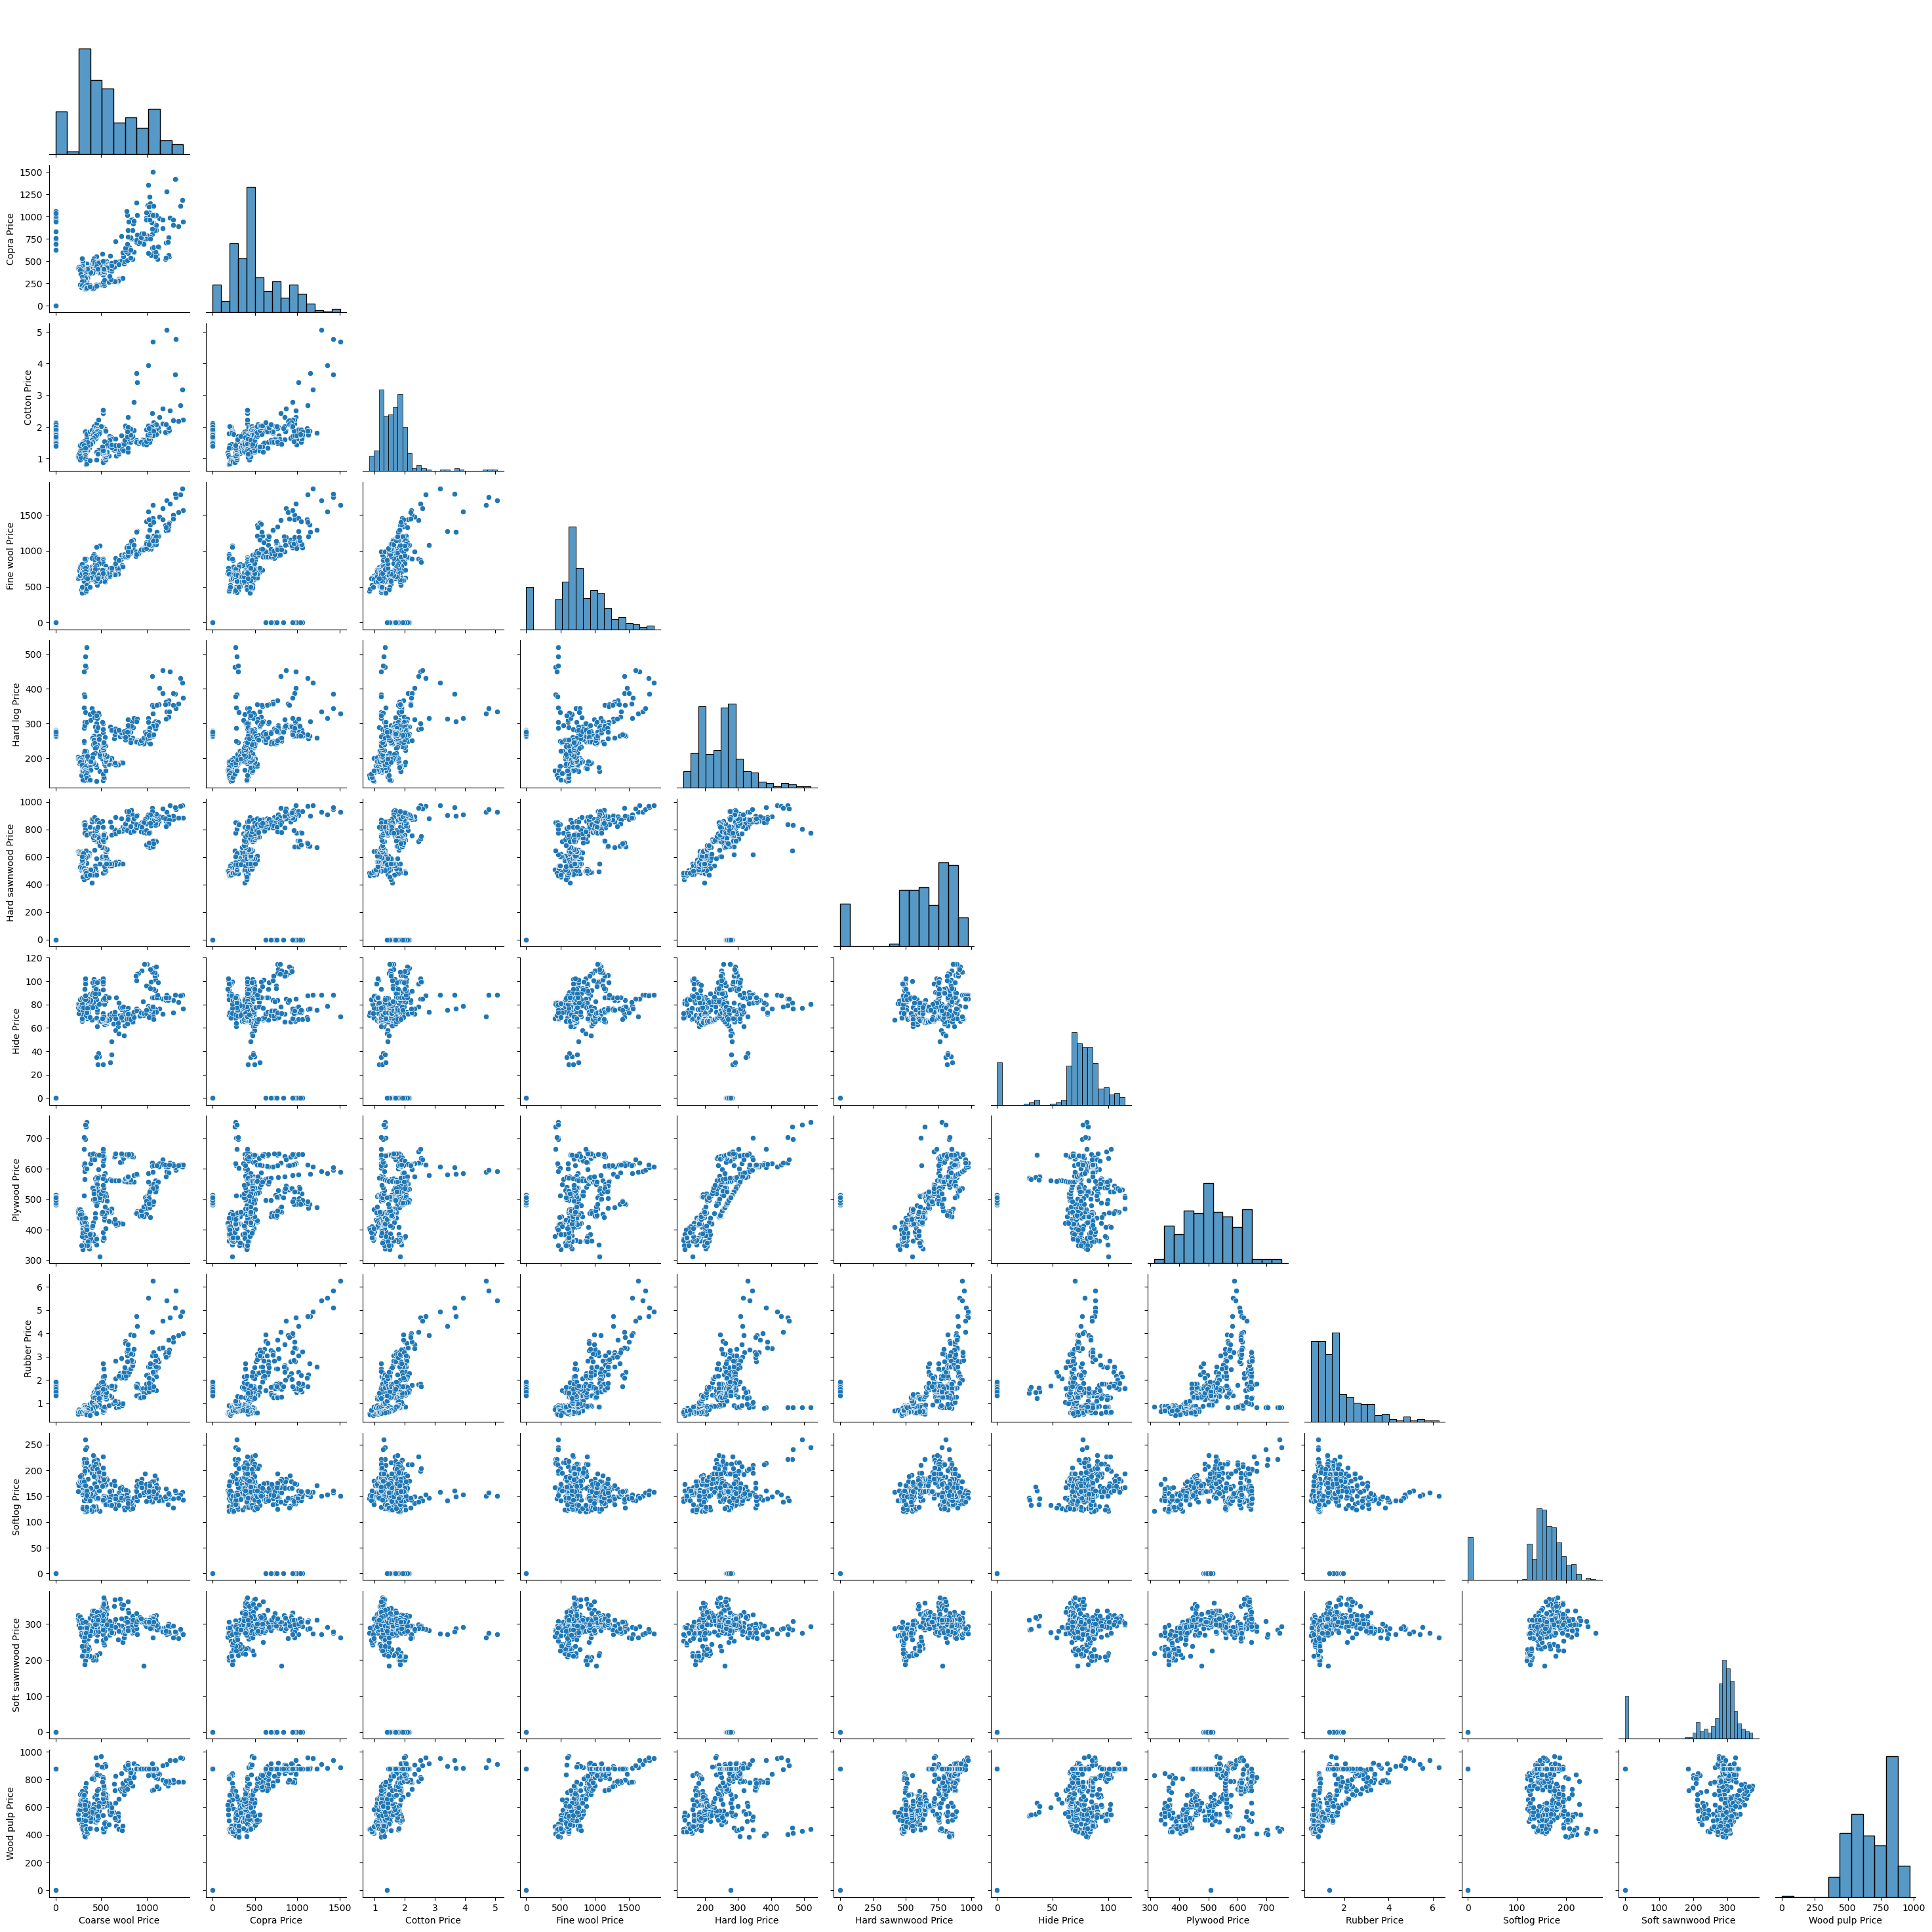

In [27]:
sns.pairplot(df_copy, corner= True);

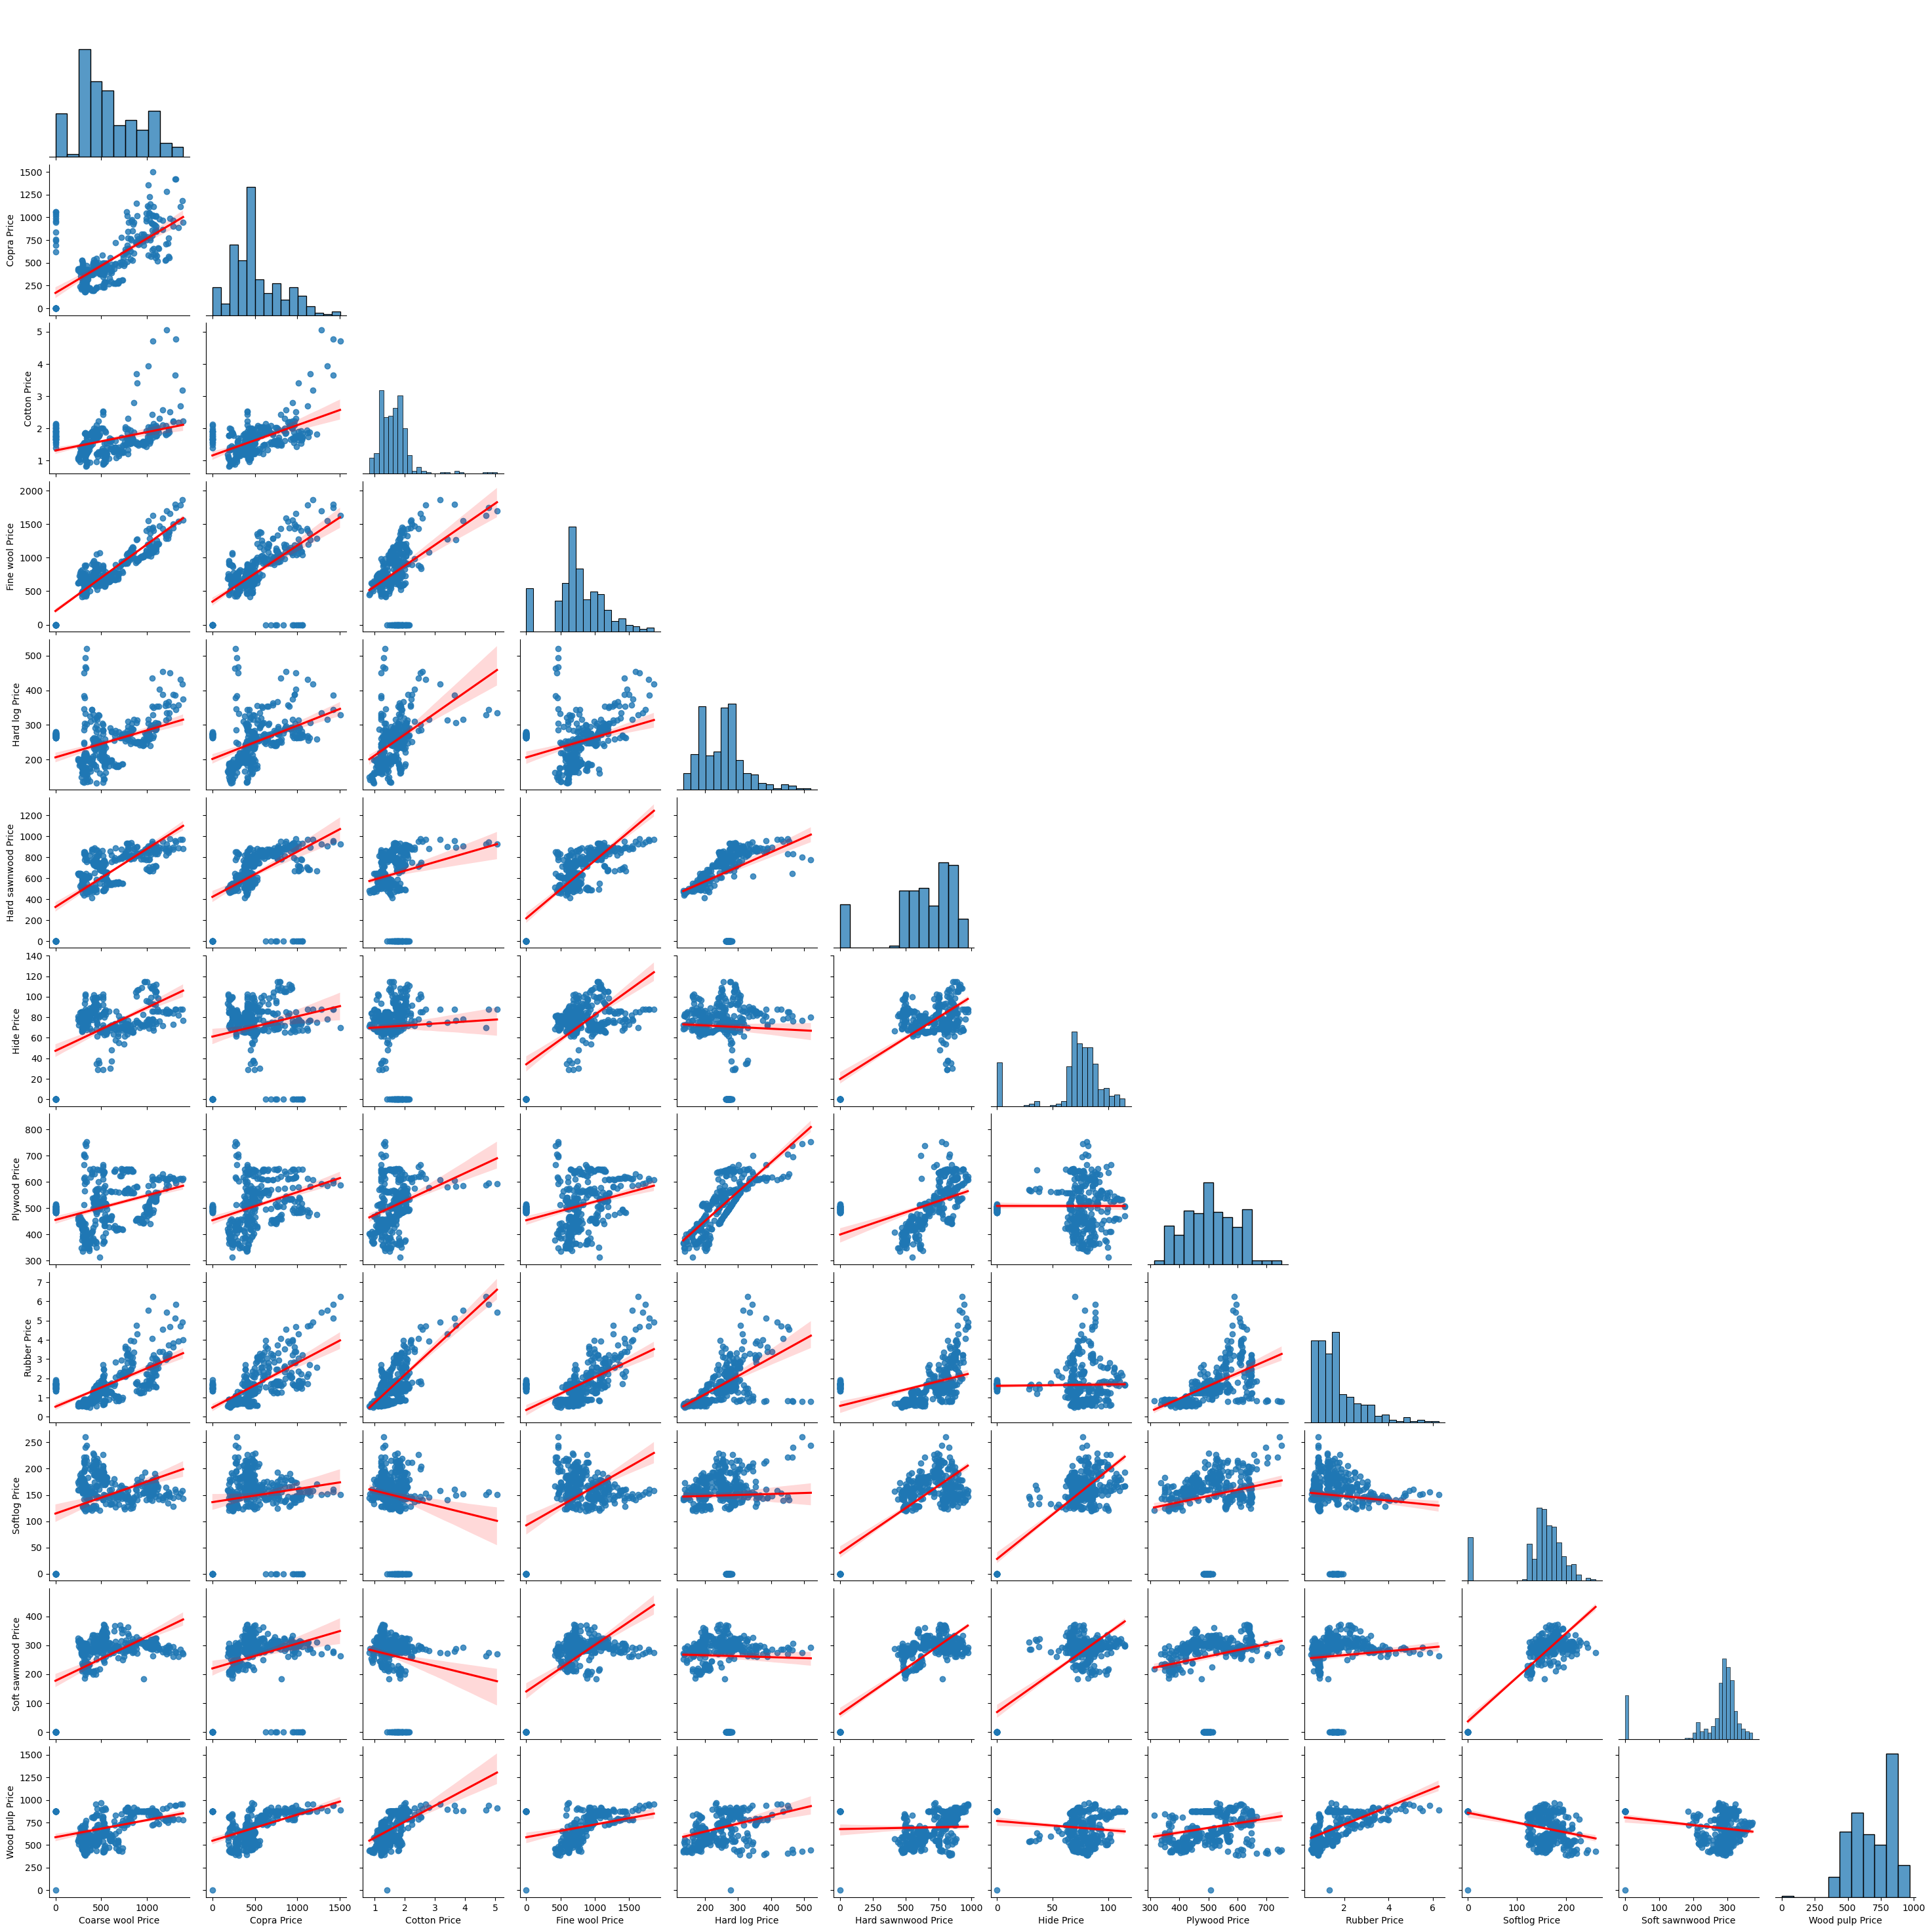

In [28]:
sns.pairplot(df_copy, corner= True, kind = 'reg', plot_kws = {'line_kws':{'color': 'red'}});

<Axes: xlabel='Cotton Price', ylabel='Rubber Price'>

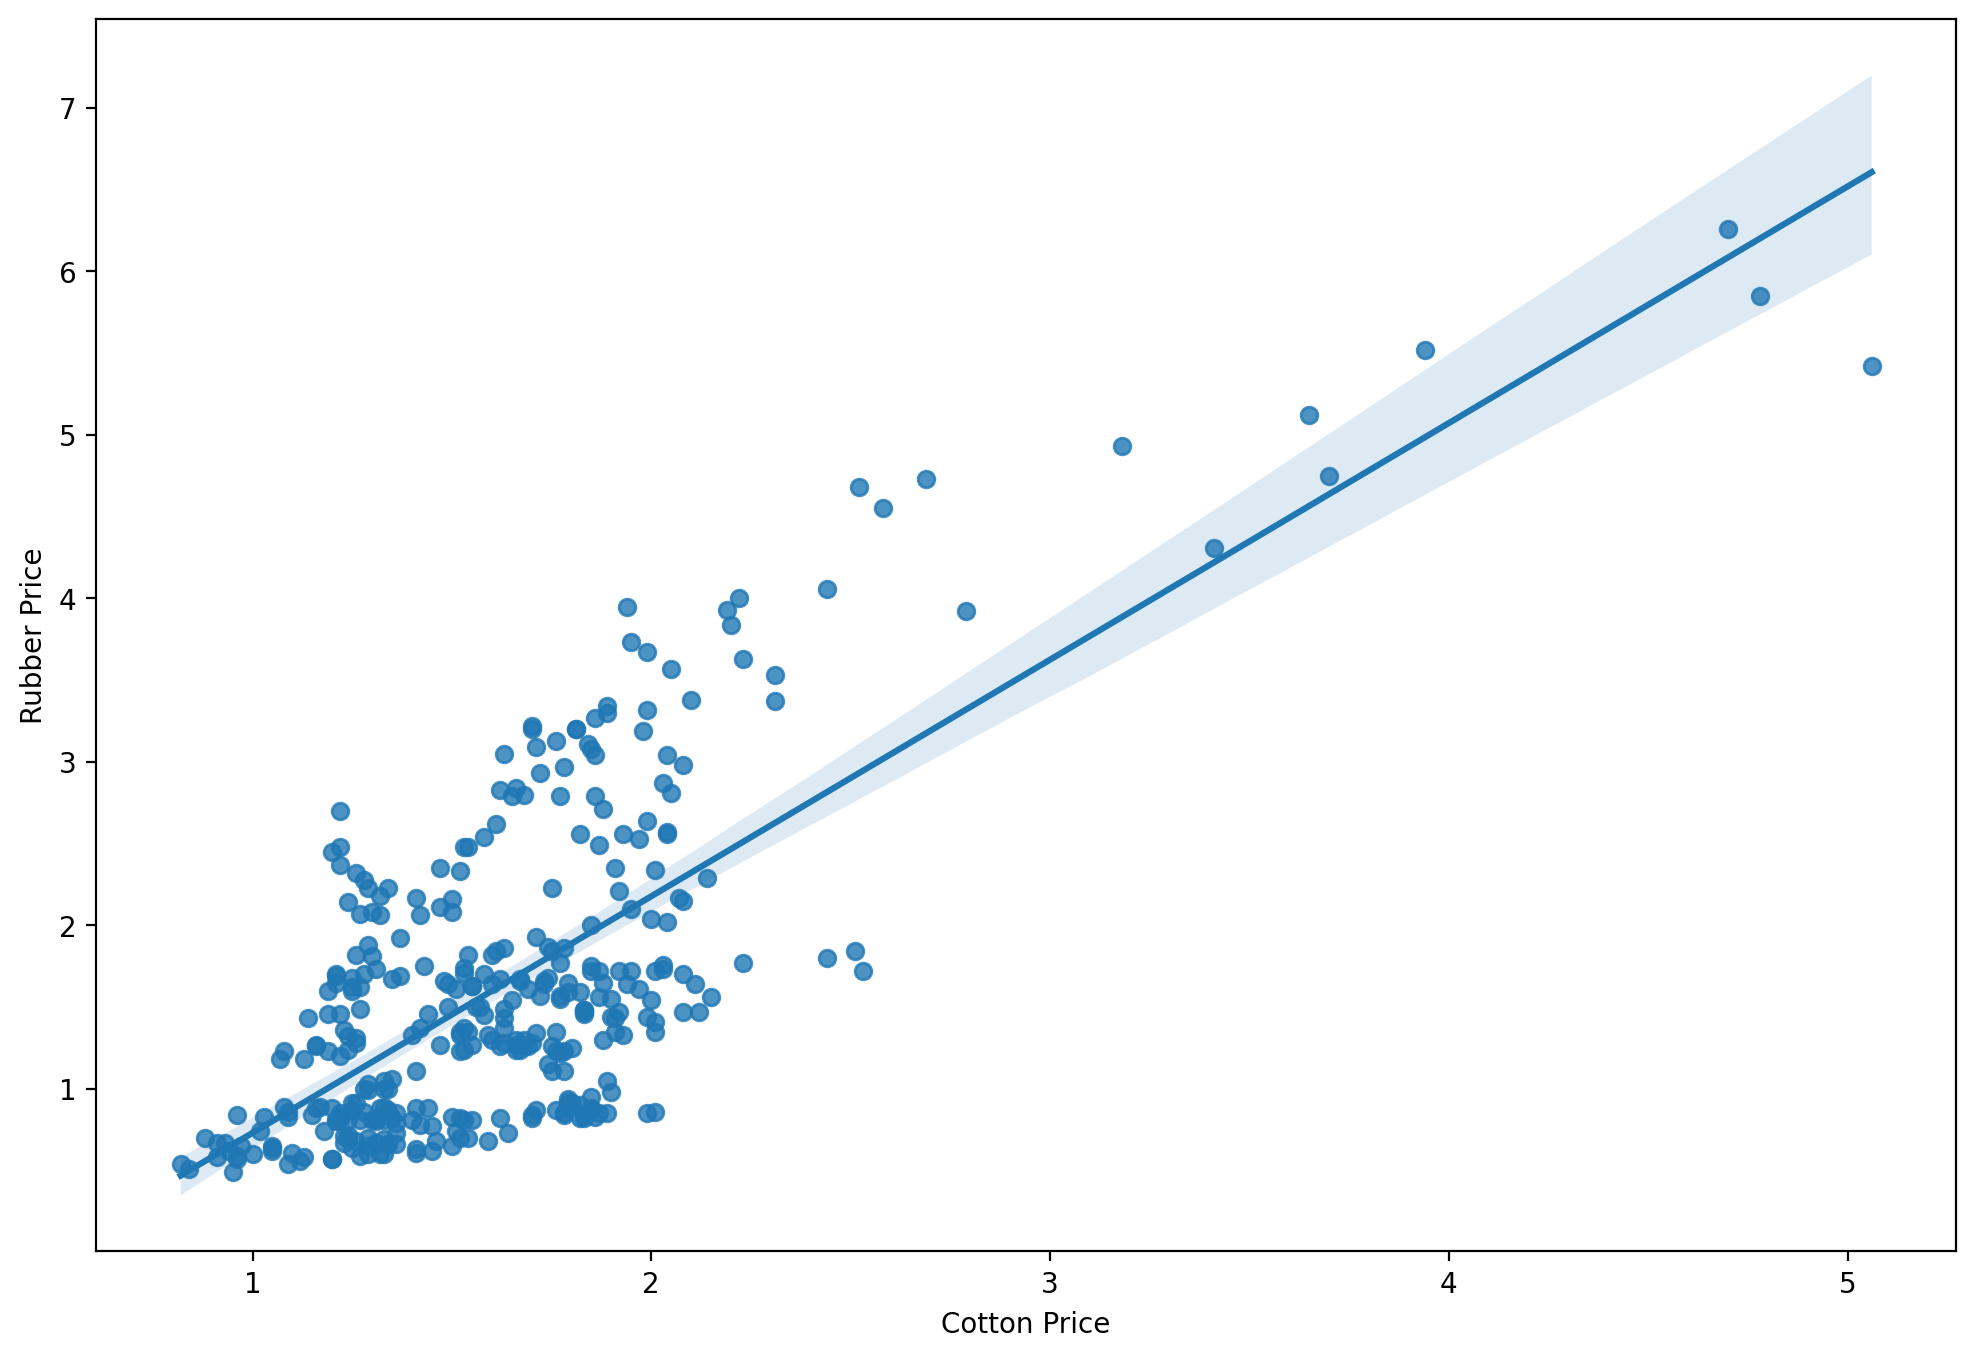

In [29]:
plt.figure(figsize=(12,8), dpi=200)
sns.regplot(x=df_copy['Cotton Price'], y = df_copy['Rubber Price'])

<Axes: xlabel='Hard log Price', ylabel='Plywood Price'>

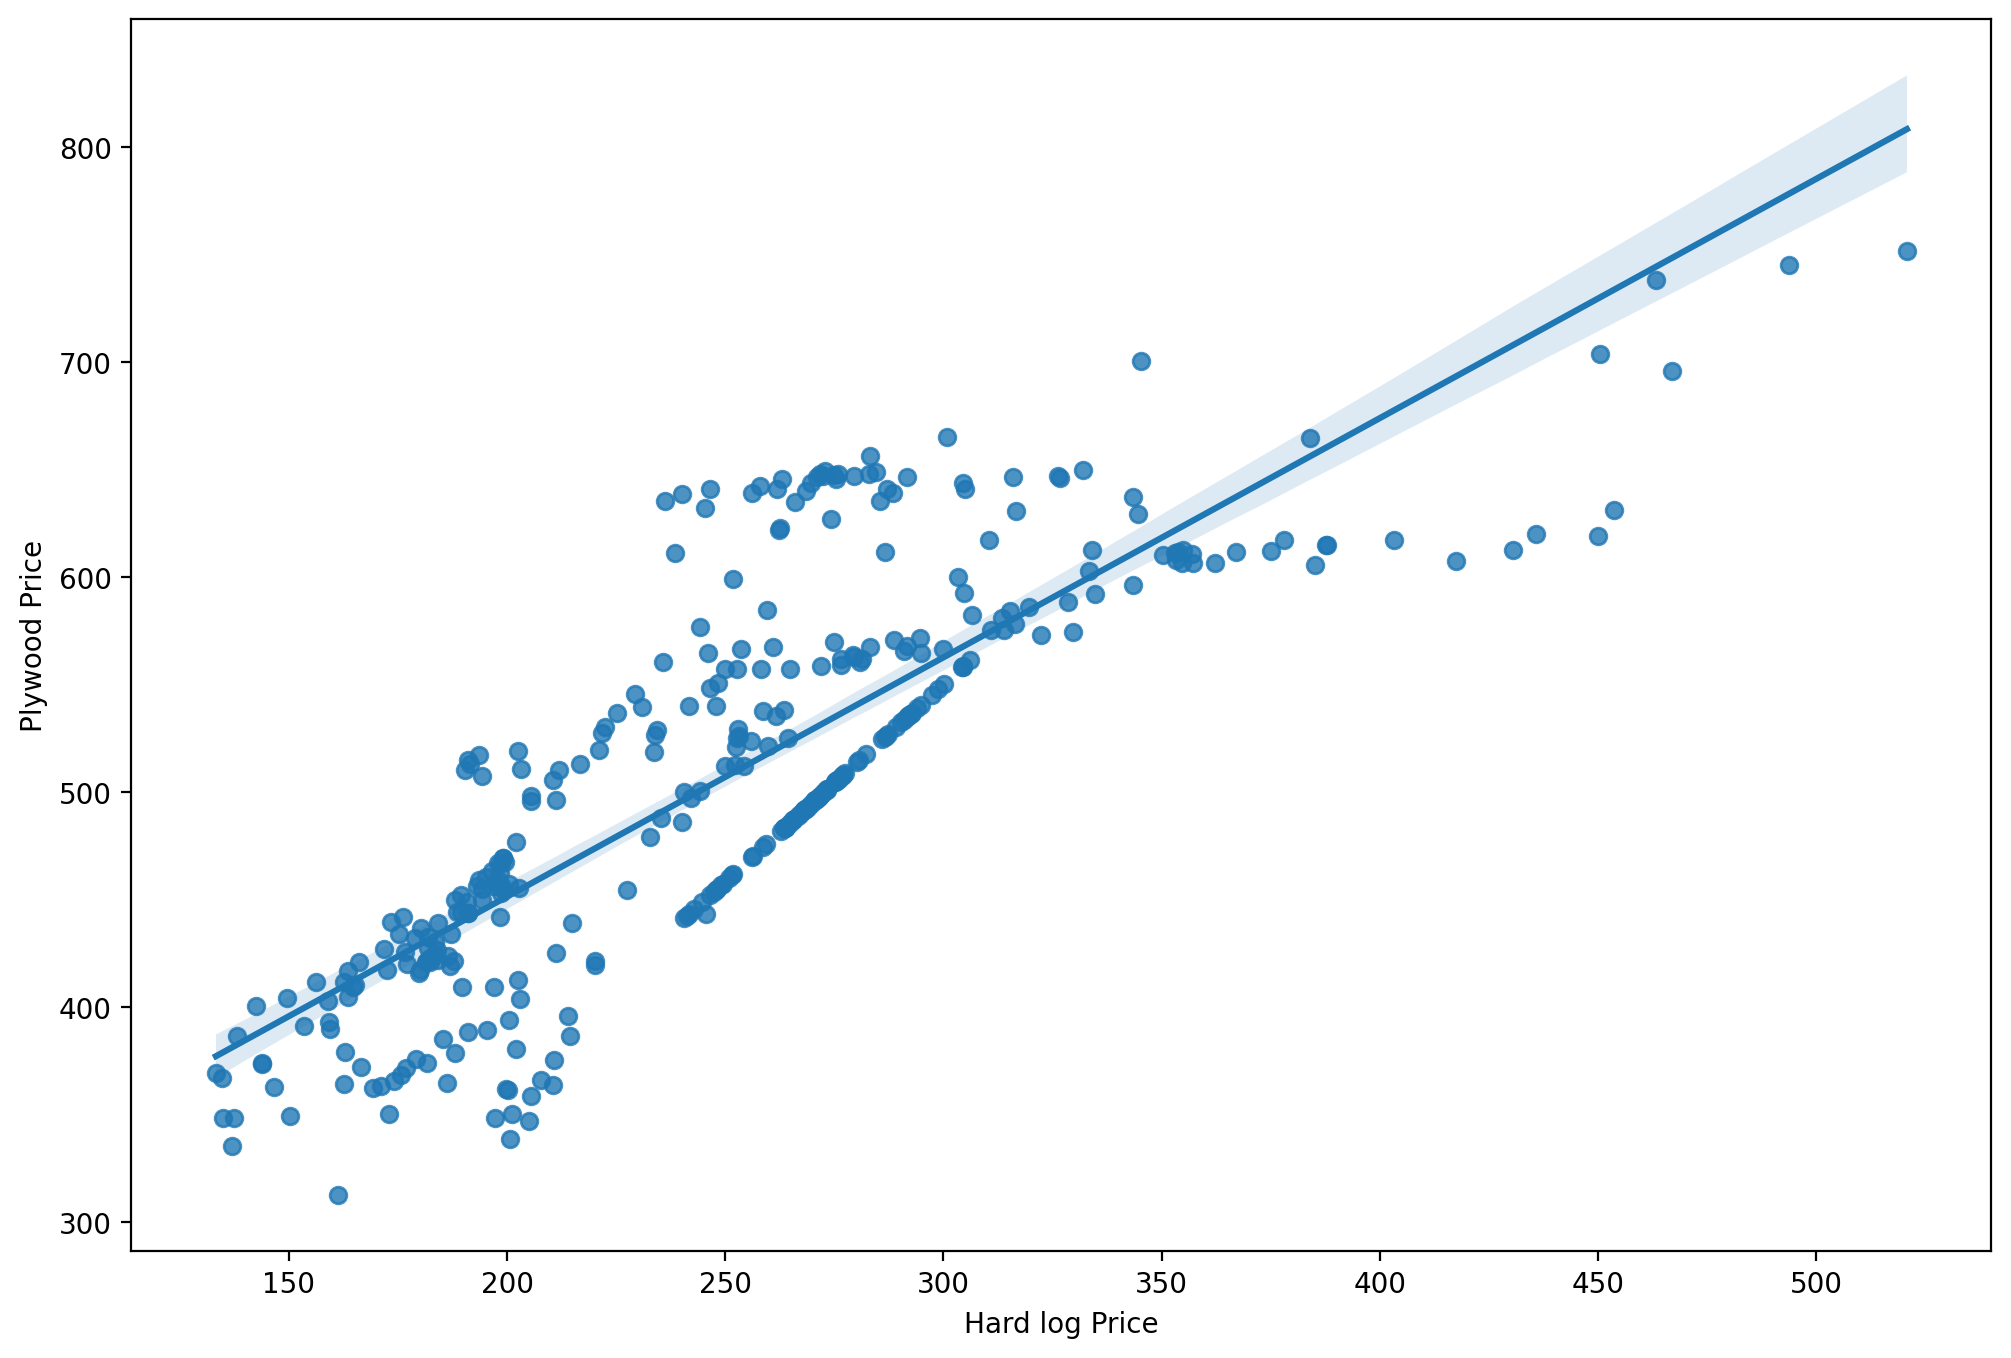

In [30]:
plt.figure(figsize=(12,8), dpi=200)
sns.regplot(x=df_copy['Hard log Price'], y = df_copy['Plywood Price'])

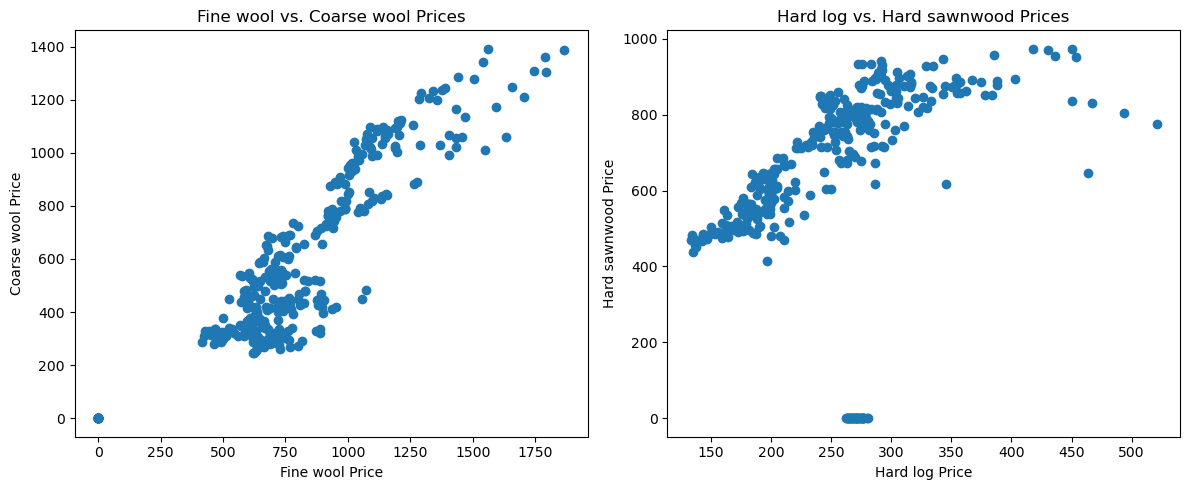

In [31]:
plt.figure(figsize=(12, 5))
# Fine wool vs. Coarse wool
plt.subplot(1, 2, 1)
plt.scatter(df_copy['Fine wool Price'], df_copy['Coarse wool Price'])
plt.xlabel('Fine wool Price')
plt.ylabel('Coarse wool Price')
plt.title('Fine wool vs. Coarse wool Prices')


# Hard log vs. Hard sawnwood
plt.subplot(1, 2, 2)
plt.scatter(df_copy['Hard log Price'], df_copy['Hard sawnwood Price'])
plt.xlabel('Hard log Price')
plt.ylabel('Hard sawnwood Price')
plt.title('Hard log vs. Hard sawnwood Prices')

plt.tight_layout()
plt.show()


Fine wool vs. Coarse wool:
The scatter plot shows a strong positive linear relationship between fine wool and coarse wool prices. This indicates that as the price of one type of wool increases, the other tends to increase as well. This relationship is likely due to similar market forces affecting both types of wool, such as overall demand for wool products, sheep farming conditions, and global textile industry trends.

Hard log vs. Hard sawnwood:
The scatter plot reveals a positive relationship between hard log and hard sawnwood prices, but with more dispersion than the wool prices. This relationship makes sense because hard sawnwood is produced from hard logs. However, the additional processing required for sawnwood and potential market-specific factors likely contribute to the observed dispersion. Factors such as processing costs, demand for specific wood products, and regional market conditions could influence the relationship between these two prices.

In [32]:
df_copy


Month  Coarse wool Price Coarse wool price % Change  Copra Price  \
0    Apr-90             482.34                          -        236.0   
1    May-90             447.26                     -7.27%        234.0   
2    Jun-90             440.99                     -1.40%        216.0   
3    Jul-90             418.44                     -5.11%        205.0   
4    Aug-90             418.44                      0.00%        198.0   
..      ...                ...                        ...          ...   
356  Dec-19               0.00                          0          0.0   
357  Jan-20               0.00                          0          0.0   
358  Feb-20               0.00                          0          0.0   
359  Mar-20               0.00                          0          0.0   
360  Apr-20               0.00                          0          0.0   

    Copra price % Change  Cotton Price Cotton price % Change  Fine wool Price  \
0                      -          1.83                     -          1071.63   
1                 -0.85%          1.89                 3.28%          1057.18   
2                 -7.69%          1.99                 5.29%           898.24   
3                 -5.09%          2.01                 1.01%           895.83   
4                 -3.41%          1.79               -10.95%           951.22   
..                   ...           ...                   ...              ...   
356                    0          1.67                 1.21%             0.00   
357                    0          1.74                 4.19%             0.00   
358                    0          1.69                -2.87%             0.00   
359                    0          1.49               -11.83%             0.00   
360                    0          1.40                -6.04%             0.00   

    Fine wool price % Change  Hard log Price  ... Plywood price % Change  \
0                          -          161.20  ...                      -   
1                     -1.35%          172.86  ...                 12.09%   
2                    -15.03%          181.67  ...                  6.80%   
3                     -0.27%          187.96  ...                  1.21%   
4                      6.18%          186.13  ...                 -3.67%   
..                       ...             ...  ...                    ...   
356                        0          272.80  ...                 -0.22%   
357                        0          272.40  ...                 -0.15%   
358                        0          270.56  ...                 -0.67%   
359                        0          276.93  ...                  2.35%   
360                        0          276.24  ...                 -0.25%   

     Rubber Price Rubber price % Change  Softlog Price Softlog price % Change  \
0            0.84                     -         120.66                      -   
1            0.85                 1.19%         124.28                  3.00%   
2            0.85                 0.00%         129.45                  4.16%   
3            0.86                 1.18%         124.23                 -4.03%   
4            0.88                 2.33%         129.70                  4.40%   
..            ...                   ...            ...                    ...   
356          1.66                 7.79%           0.00                      0   
357          1.68                 1.20%           0.00                      0   
358          1.61                -4.17%           0.00                      0   
359          1.50                -6.83%           0.00                      0   
360          1.33               -11.33%           0.00                      0   

     Soft sawnwood Price Soft sawnwood price % Change  Wood pulp Price  \
0                 218.76                            -           829.29   
1                 213.00                       -2.63%           842.51   
2                 200.00            

In [33]:
df_copy['date'] = pd.to_datetime(df_copy['date'])

In [34]:
df_copy['Year'] = pd.DatetimeIndex(df_copy['date']).year


In [35]:
df_copy

Month  Coarse wool Price Coarse wool price % Change  Copra Price  \
0    Apr-90             482.34                          -        236.0   
1    May-90             447.26                     -7.27%        234.0   
2    Jun-90             440.99                     -1.40%        216.0   
3    Jul-90             418.44                     -5.11%        205.0   
4    Aug-90             418.44                      0.00%        198.0   
..      ...                ...                        ...          ...   
356  Dec-19               0.00                          0          0.0   
357  Jan-20               0.00                          0          0.0   
358  Feb-20               0.00                          0          0.0   
359  Mar-20               0.00                          0          0.0   
360  Apr-20               0.00                          0          0.0   

    Copra price % Change  Cotton Price Cotton price % Change  Fine wool Price  \
0                      -          1.83                     -          1071.63   
1                 -0.85%          1.89                 3.28%          1057.18   
2                 -7.69%          1.99                 5.29%           898.24   
3                 -5.09%          2.01                 1.01%           895.83   
4                 -3.41%          1.79               -10.95%           951.22   
..                   ...           ...                   ...              ...   
356                    0          1.67                 1.21%             0.00   
357                    0          1.74                 4.19%             0.00   
358                    0          1.69                -2.87%             0.00   
359                    0          1.49               -11.83%             0.00   
360                    0          1.40                -6.04%             0.00   

    Fine wool price % Change  Hard log Price  ... Rubber Price  \
0                          -          161.20  ...         0.84   
1                     -1.35%          172.86  ...         0.85   
2                    -15.03%          181.67  ...         0.85   
3                     -0.27%          187.96  ...         0.86   
4                      6.18%          186.13  ...         0.88   
..                       ...             ...  ...          ...   
356                        0          272.80  ...         1.66   
357                        0          272.40  ...         1.68   
358                        0          270.56  ...         1.61   
359                        0          276.93  ...         1.50   
360                        0          276.24  ...         1.33   

     Rubber price % Change Softlog Price  Softlog price % Change  \
0                        -        120.66                       -   
1                    1.19%        124.28                   3.00%   
2                    0.00%        129.45                   4.16%   
3                    1.18%        124.23                  -4.03%   
4                    2.33%        129.70                   4.40%   
..                     ...           ...                     ...   
356                  7.79%          0.00                       0   
357                  1.20%          0.00                       0   
358                 -4.17%          0.00                       0   
359                 -6.83%          0.00                       0   
360                -11.33%          0.00                       0   

    Soft sawnwood Price  Soft sawnwood price % Change Wood pulp Price  \
0                218.76                             -          829.29   
1                213.00                        -2.63%          842.51   
2                200.00                        -6.10%          831.35   
3                210.05                         5.03%          798.83   
4                208.30                        -0.83%          818.74   
..                  ...                           ...             ...   
356                0.00

In [36]:
df_copy = df_copy.sort_values('Year')

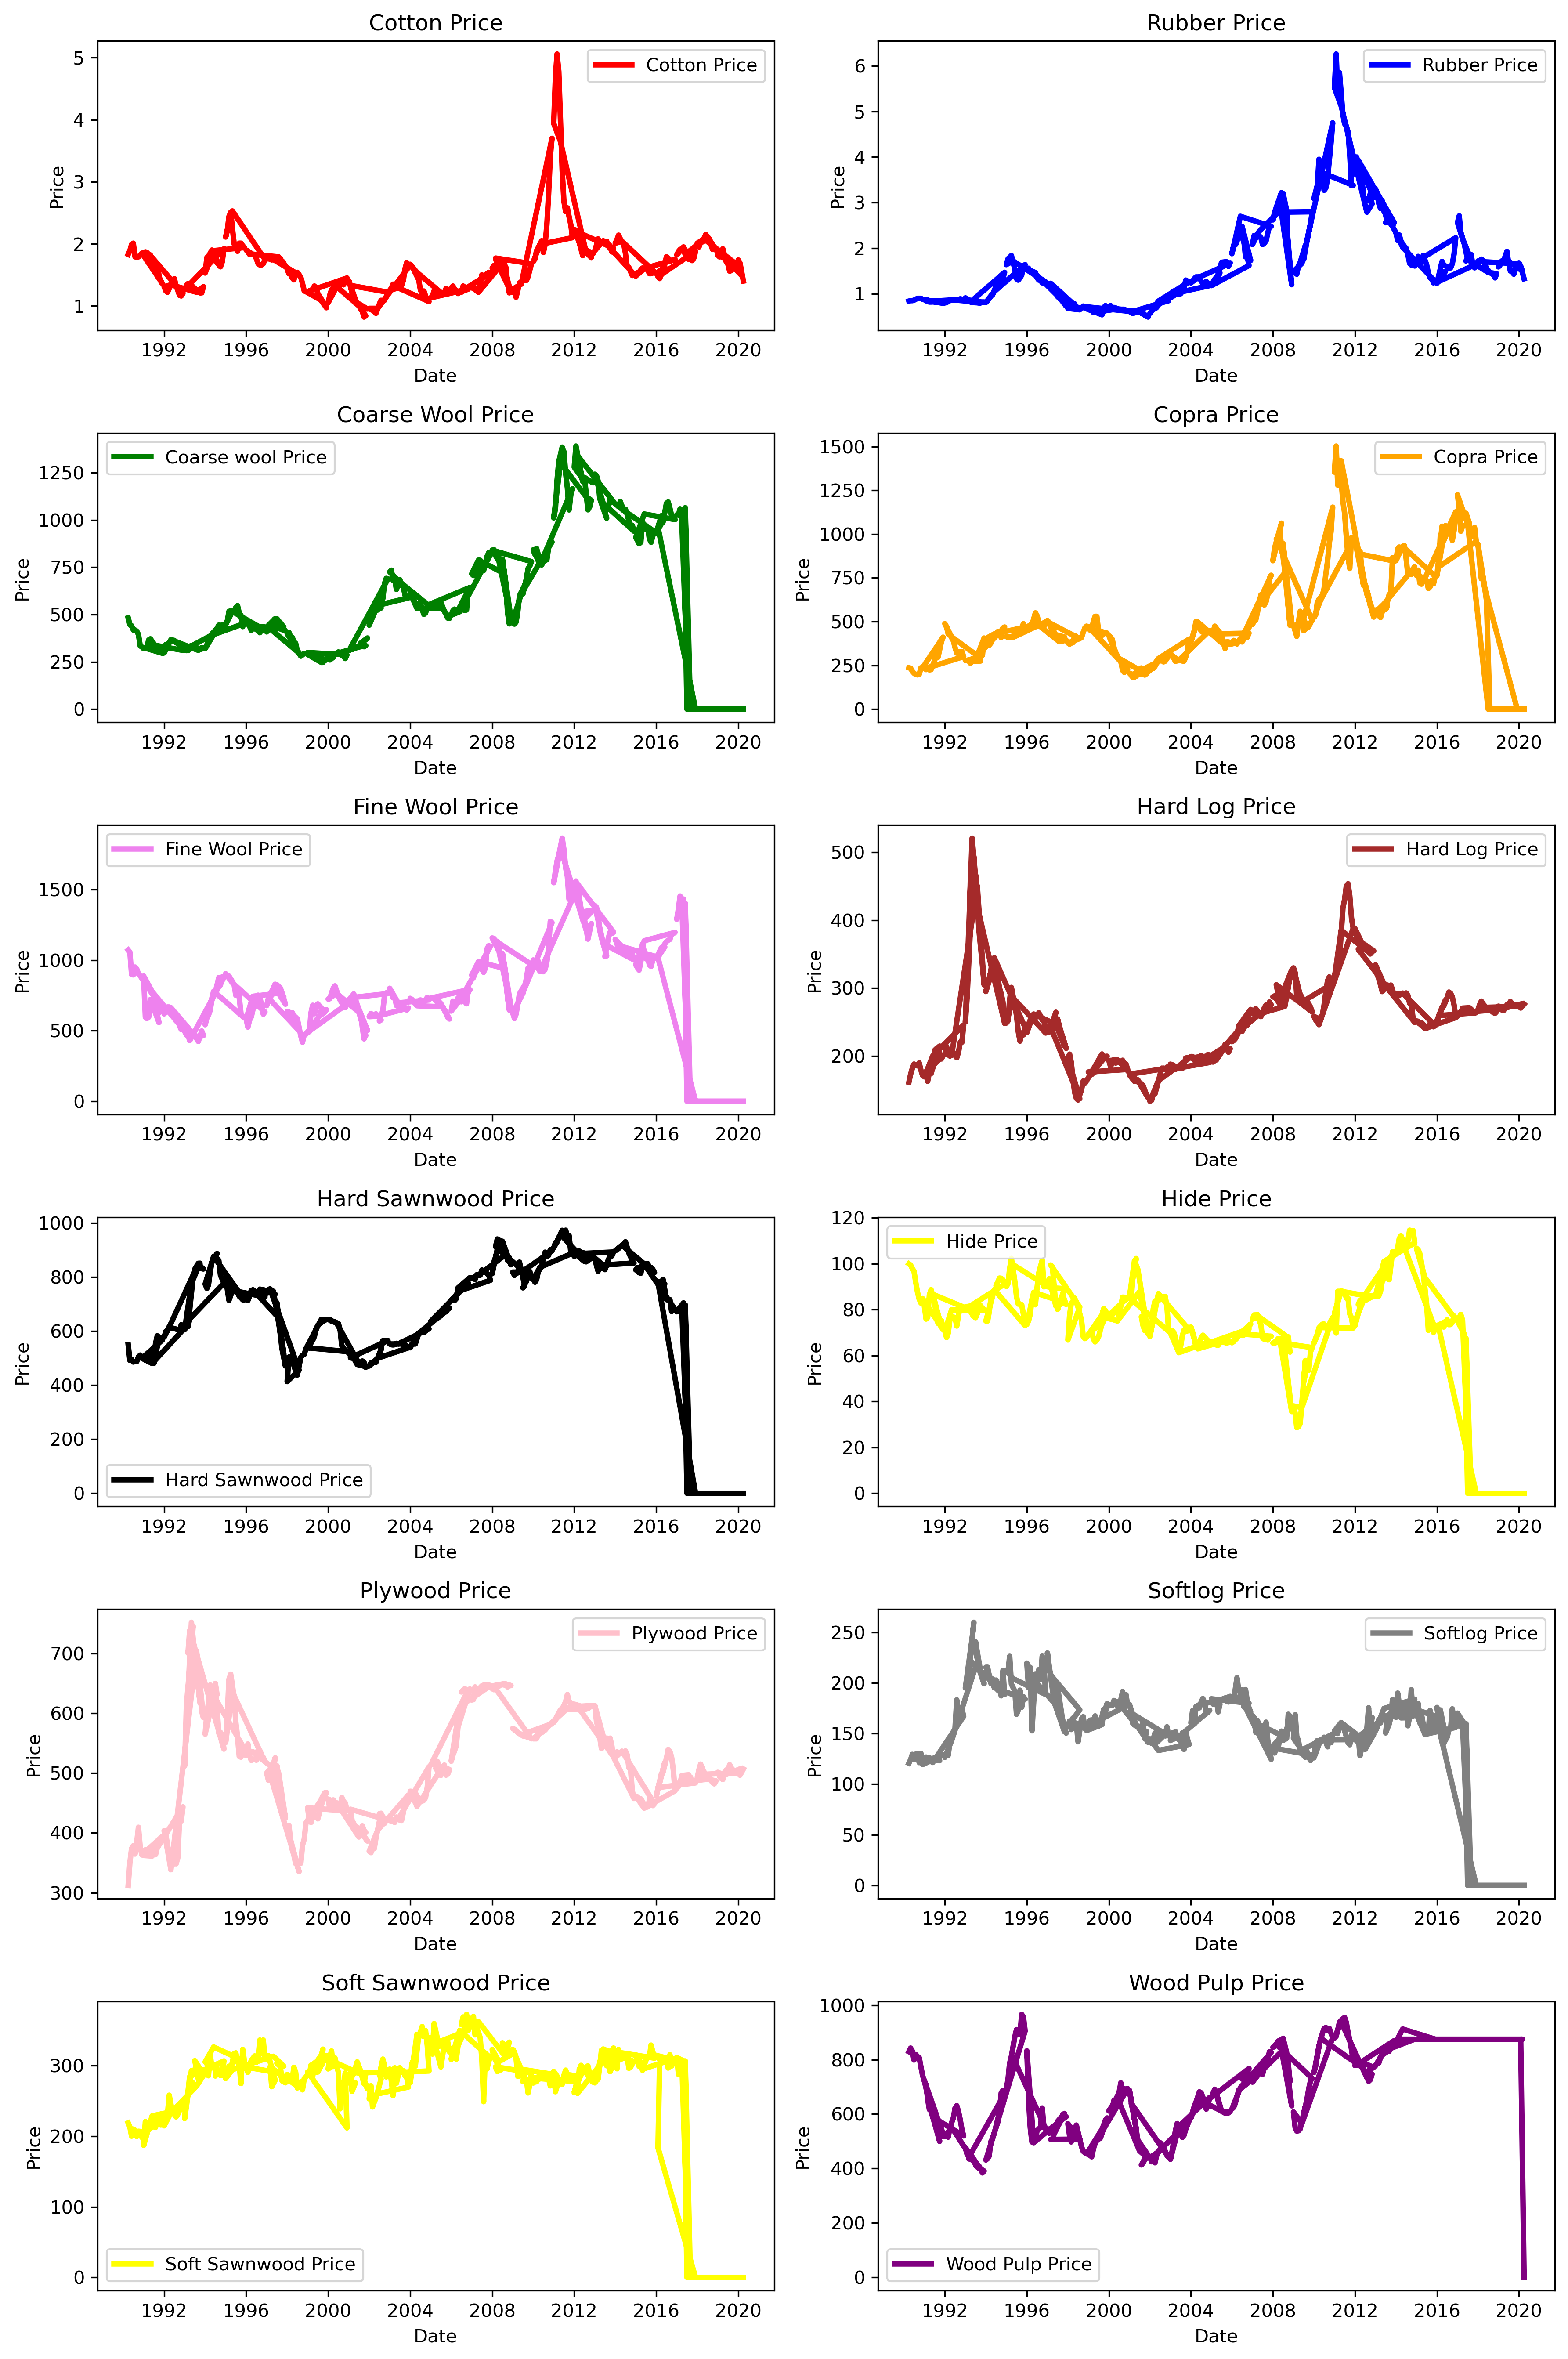

In [37]:
import matplotlib.pyplot as plt

# Create a figure with a 6x2 grid
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12, 18), dpi=300)

# Plot each price in separate subplots without using a for loop
axs[0, 0].plot(df_copy['date'], df_copy['Cotton Price'], color='red', lw=3, label='Cotton Price')
axs[0, 0].set_title('Cotton Price')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price')
axs[0, 0].legend()

axs[0, 1].plot(df_copy['date'], df_copy['Rubber Price'], color='blue', lw=3, label='Rubber Price')
axs[0, 1].set_title('Rubber Price')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price')
axs[0, 1].legend()

axs[1, 0].plot(df_copy['date'], df_copy['Coarse wool Price'], color='green', lw=3, label='Coarse wool Price')
axs[1, 0].set_title('Coarse Wool Price')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Price')
axs[1, 0].legend()

axs[1, 1].plot(df_copy['date'], df_copy['Copra Price'], color='orange', lw=3, label='Copra Price')
axs[1, 1].set_title('Copra Price')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Price')
axs[1, 1].legend()

axs[2, 0].plot(df_copy['date'], df_copy['Fine wool Price'], color='violet', lw=3, label='Fine Wool Price')
axs[2, 0].set_title('Fine Wool Price')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('Price')
axs[2, 0].legend()

axs[2, 1].plot(df_copy['date'], df_copy['Hard log Price'], color='brown', lw=3, label='Hard Log Price')
axs[2, 1].set_title('Hard Log Price')
axs[2, 1].set_xlabel('Date')
axs[2, 1].set_ylabel('Price')
axs[2, 1].legend()

axs[3, 0].plot(df_copy['date'], df_copy['Hard sawnwood Price'], color='black', lw=3, label='Hard Sawnwood Price')
axs[3, 0].set_title('Hard Sawnwood Price')
axs[3, 0].set_xlabel('Date')
axs[3, 0].set_ylabel('Price')
axs[3, 0].legend()

axs[3, 1].plot(df_copy['date'], df_copy['Hide Price'], color='yellow', lw=3, label='Hide Price')
axs[3, 1].set_title('Hide Price')
axs[3, 1].set_xlabel('Date')
axs[3, 1].set_ylabel('Price')
axs[3, 1].legend()

axs[4, 0].plot(df_copy['date'], df_copy['Plywood Price'], color='pink', lw=3, label='Plywood Price')
axs[4, 0].set_title('Plywood Price')
axs[4, 0].set_xlabel('Date')
axs[4, 0].set_ylabel('Price')
axs[4, 0].legend()

axs[4, 1].plot(df_copy['date'], df_copy['Softlog Price'], color='grey', lw=3, label='Softlog Price')
axs[4, 1].set_title('Softlog Price')
axs[4, 1].set_xlabel('Date')
axs[4, 1].set_ylabel('Price')
axs[4, 1].legend()

axs[5, 0].plot(df_copy['date'], df_copy['Soft sawnwood Price'], color='yellow', lw=3, label='Soft Sawnwood Price')
axs[5, 0].set_title('Soft Sawnwood Price')
axs[5, 0].set_xlabel('Date')
axs[5, 0].set_ylabel('Price')
axs[5, 0].legend()

axs[5, 1].plot(df_copy['date'], df_copy['Wood pulp Price'], color='purple', lw=3, label='Wood Pulp Price')
axs[5, 1].set_title('Wood Pulp Price')
axs[5, 1].set_xlabel('Date')
axs[5, 1].set_ylabel('Price')
axs[5, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [38]:
df_copy[df_copy['Year'] == 2020]['Fine wool Price']

359    0.0
357    0.0
358    0.0
360    0.0
Name: Fine wool Price, dtype: float64

In [39]:
price_columns = ['Cotton Price', 'Rubber Price', 'Coarse wool Price', 'Copra Price',
                 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 
                 'Hide Price', 'Plywood Price', 'Softlog Price', 
                 'Soft sawnwood Price', 'Wood pulp Price']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Cotton Price'),
  Text(1, 0, 'Rubber Price'),
  Text(2, 0, 'Coarse wool Price'),
  Text(3, 0, 'Copra Price'),
  Text(4, 0, 'Fine wool Price'),
  Text(5, 0, 'Hard log Price'),
  Text(6, 0, 'Hard sawnwood Price'),
  Text(7, 0, 'Hide Price'),
  Text(8, 0, 'Plywood Price'),
  Text(9, 0, 'Softlog Price'),
  Text(10, 0, 'Soft sawnwood Price'),
  Text(11, 0, 'Wood pulp Price')])

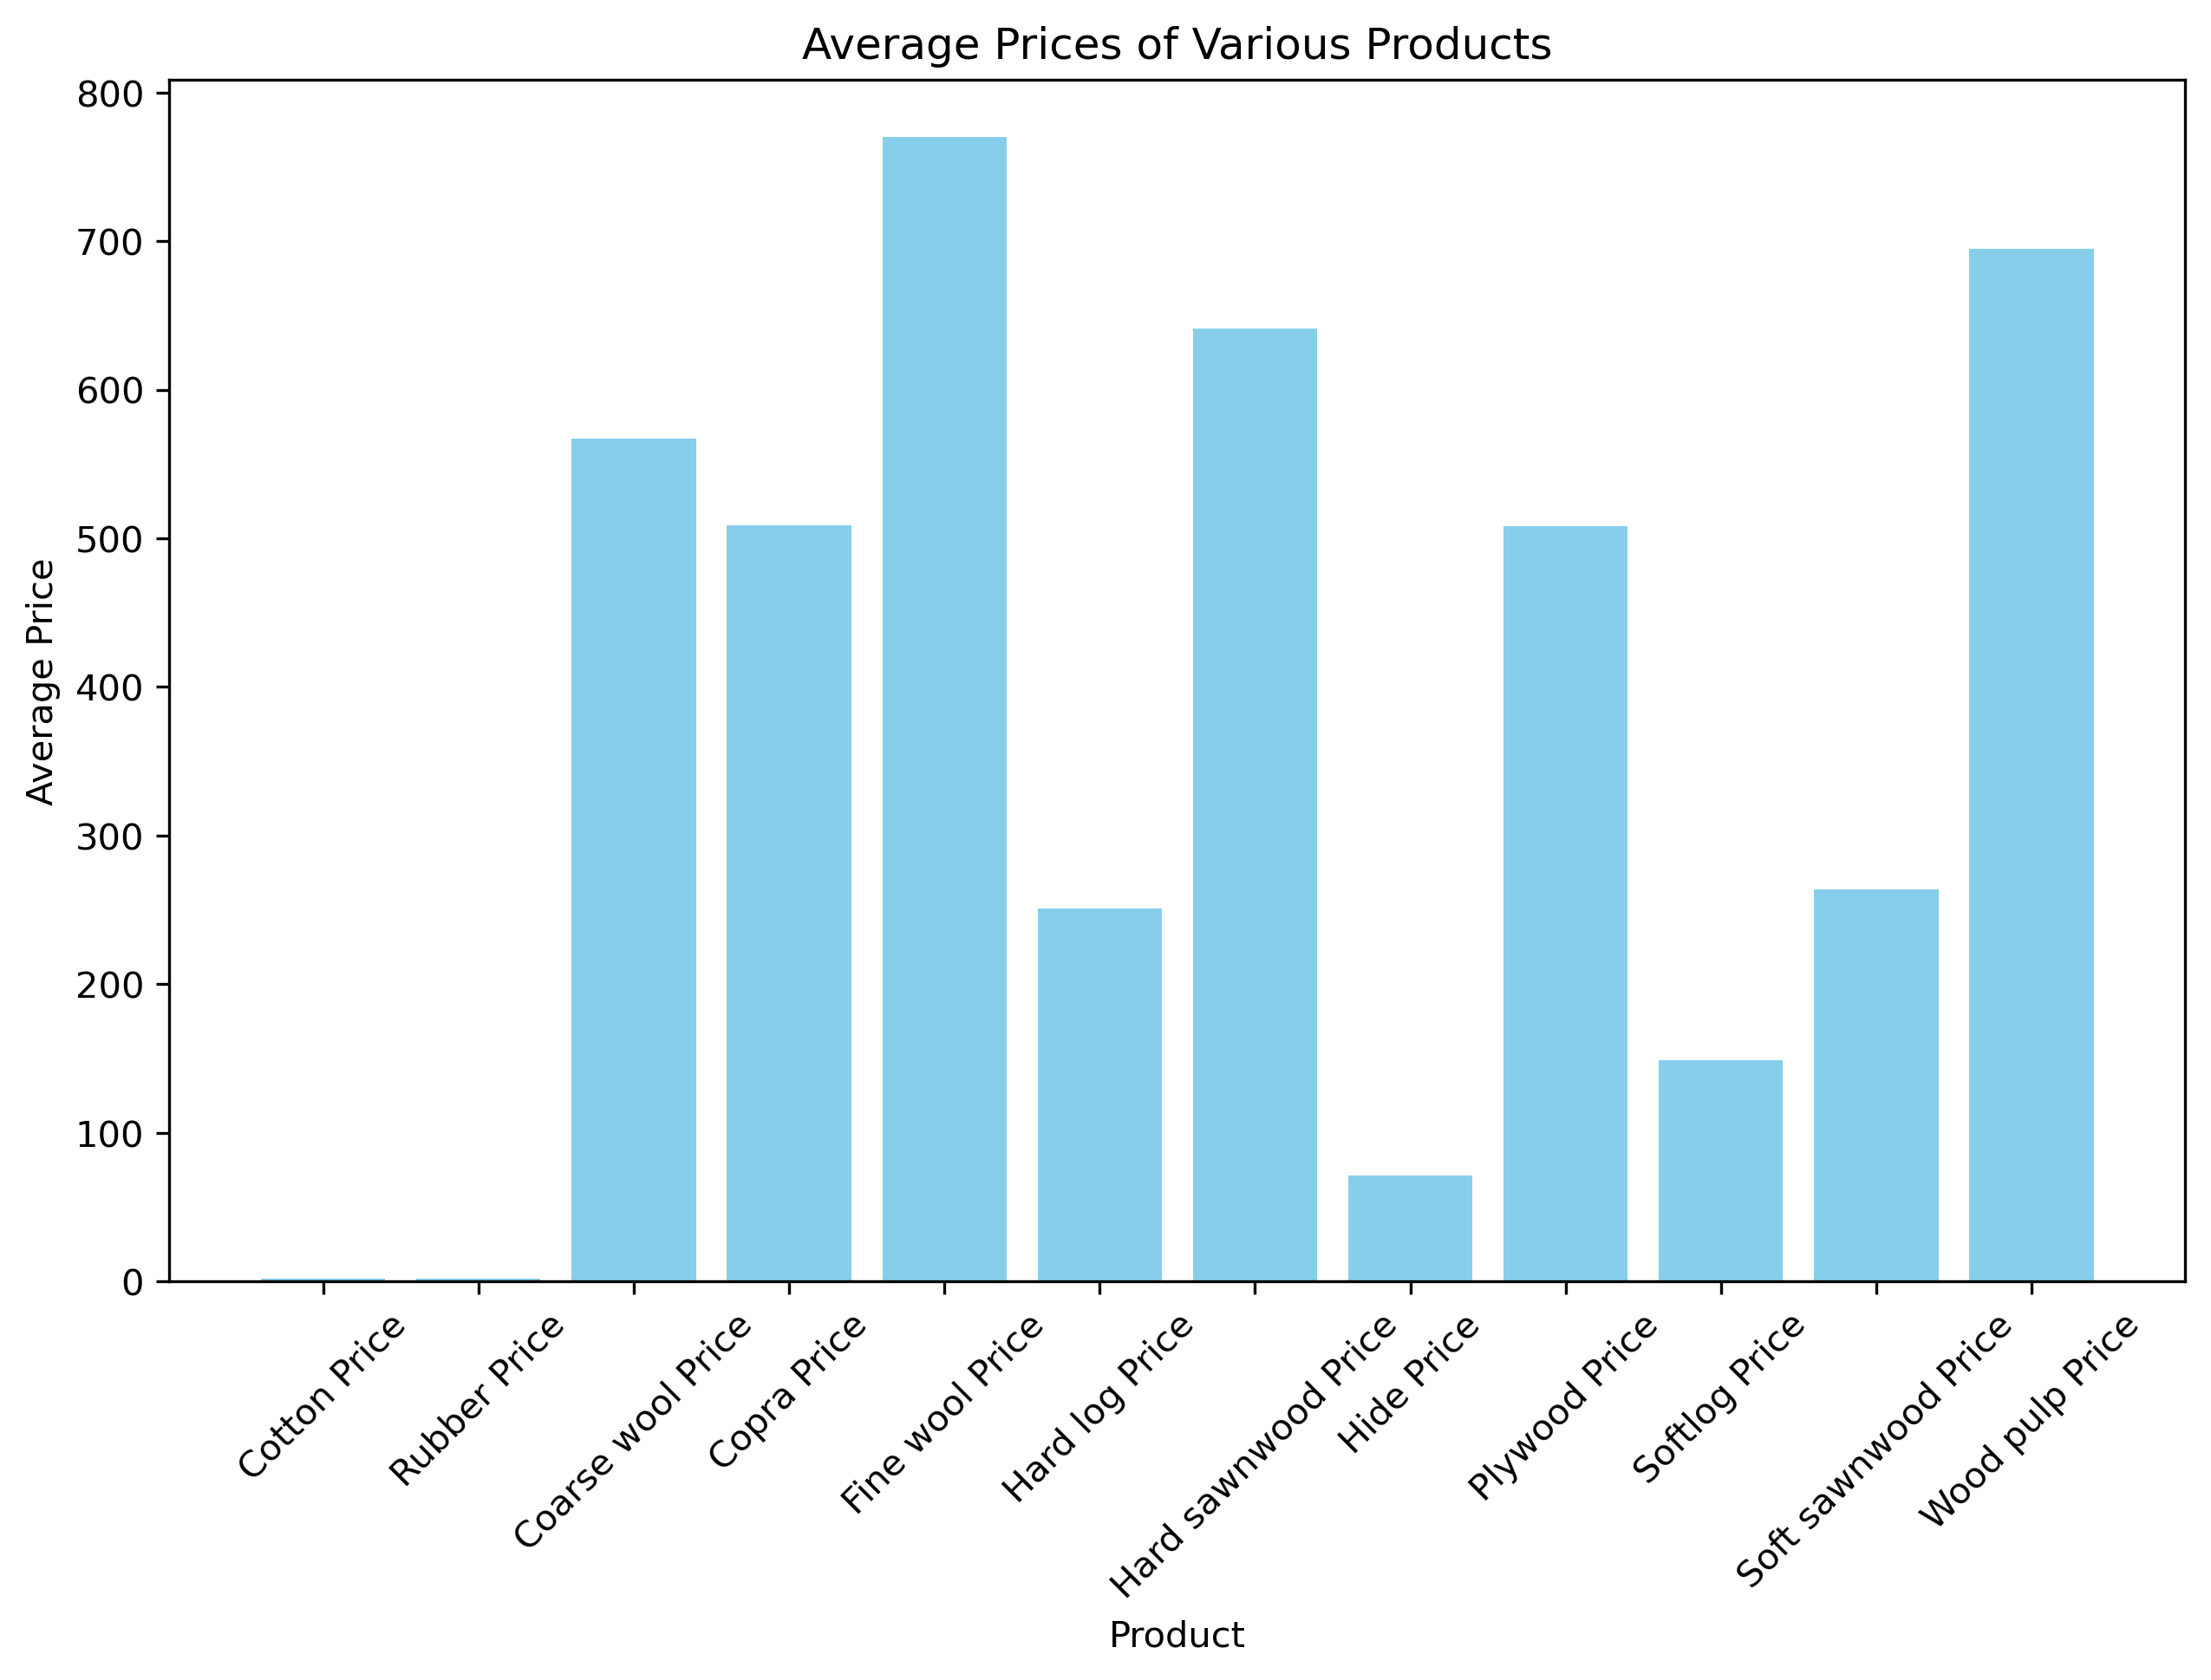

In [41]:
average_prices = [df_copy[price].mean() for price in price_columns]
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(price_columns, average_prices, color='skyblue')
plt.title('Average Prices of Various Products')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.xticks(rotation=45) 

In [42]:
average_prices

[1.64,
 1.656426592797784,
 567.3438504155125,
 508.99188365650974,
 770.0529085872575,
 251.03407202216064,
 641.2736011080333,
 71.16703601108034,
 508.21612188365657,
 149.03180055401663,
 263.64869806094185,
 694.741052631579]

([<matplotlib.axis.XTick at 0x17632af30>,
 [Text(0, 0, 'Cotton Price'), Text(1, 0, 'Rubber Price')])

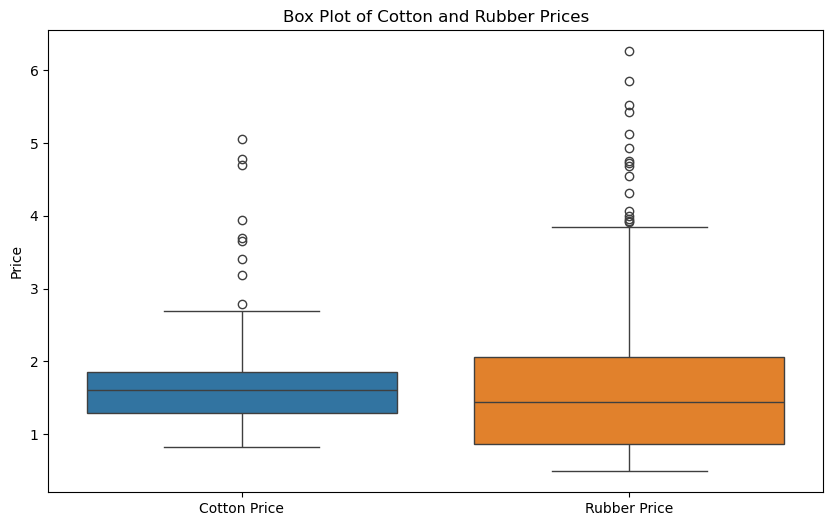

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Cotton Price', 'Rubber Price']])
plt.title('Box Plot of Cotton and Rubber Prices')
plt.ylabel('Price')
plt.xticks([0, 1], ['Cotton Price', 'Rubber Price'])  # Custom x-tick labels


In [44]:
df_copy_2=df

In [45]:
df_copy_2

Month  Coarse wool Price Coarse wool price % Change  Copra Price  \
0    Apr-90             482.34                          -        236.0   
1    May-90             447.26                     -7.27%        234.0   
2    Jun-90             440.99                     -1.40%        216.0   
3    Jul-90             418.44                     -5.11%        205.0   
4    Aug-90             418.44                      0.00%        198.0   
..      ...                ...                        ...          ...   
356  Dec-19                NaN                        NaN          NaN   
357  Jan-20                NaN                        NaN          NaN   
358  Feb-20                NaN                        NaN          NaN   
359  Mar-20                NaN                        NaN          NaN   
360  Apr-20                NaN                        NaN          NaN   

    Copra price % Change  Cotton Price Cotton price % Change  Fine wool Price  \
0                      -          1.83                     -          1071.63   
1                 -0.85%          1.89                 3.28%          1057.18   
2                 -7.69%          1.99                 5.29%           898.24   
3                 -5.09%          2.01                 1.01%           895.83   
4                 -3.41%          1.79               -10.95%           951.22   
..                   ...           ...                   ...              ...   
356                  NaN          1.67                 1.21%              NaN   
357                  NaN          1.74                 4.19%              NaN   
358                  NaN          1.69                -2.87%              NaN   
359                  NaN          1.49               -11.83%              NaN   
360                  NaN          1.40                -6.04%              NaN   

    Fine wool price % Change  Hard log Price  ... Plywood Price  \
0                          -          161.20  ...        312.36   
1                     -1.35%          172.86  ...        350.12   
2                    -15.03%          181.67  ...        373.94   
3                     -0.27%          187.96  ...        378.48   
4                      6.18%          186.13  ...        364.60   
..                       ...             ...  ...           ...   
356                      NaN          272.80  ...        500.37   
357                      NaN          272.40  ...        499.64   
358                      NaN          270.56  ...        496.28   
359                      NaN          276.93  ...        507.96   
360                      NaN          276.24  ...        506.68   

     Plywood price % Change Rubber Price  Rubber price % Change Softlog Price  \
0                         -         0.84                      -        120.66   
1                    12.09%         0.85                  1.19%        124.28   
2                     6.80%         0.85                  0.00%        129.45   
3                     1.21%         0.86                  1.18%        124.23   
4                    -3.67%         0.88                  2.33%        129.70   
..                      ...          ...                    ...           ...   
356                  -0.22%         1.66                  7.79%           NaN   
357                  -0.15%         1.68                  1.20%           NaN   
358                  -0.67%         1.61                 -4.17%           NaN   
359                   2.35%         1.50                 -6.83%           NaN   
360                  -0.25%         1.33                -11.33%           NaN   

     Softlog price % Change Soft sawnwood Price  Soft sawnwood price % Change  \
0                         -              218.76                             -   
1                     3.00%              213.00                        -2.63%   
2                     4.16%              200.00                        -6.10%   
3                    -4.03%              2

In [46]:
coarse_wool_mean=df_copy_2['Coarse wool Price'].mean()
copra_mean=df_copy_2['Copra Price'].mean()
fine_wool_mean=df_copy_2['Fine wool Price'].mean()
hard_sawnwood_mean=df_copy_2['Hard sawnwood Price'].mean()
soft_sawnwood_mean=df_copy_2['Soft sawnwood Price'].mean()
softlog_mean=df_copy_2['Softlog Price'].mean()
hide_mean=df_copy_2['Hide Price'].mean()

In [47]:
df_copy_2['Coarse wool Price'].fillna(coarse_wool_mean, inplace = True)

/var/folders/9w/6lykslpn49jbsjcmz5mvkhz40000gn/T/ipykernel_99328/1809011988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy_2['Coarse wool Price'].fillna(coarse_wool_mean, inplace = True)


In [48]:
df_copy_2['Copra Price'].fillna(copra_mean, inplace = True)
df_copy_2['Fine wool Price'].fillna(fine_wool_mean, inplace = True)
df_copy_2['Hard sawnwood Price'].fillna(hard_sawnwood_mean, inplace = True)
df_copy_2['Soft sawnwood Price'].fillna(soft_sawnwood_mean, inplace = True)
df_copy_2['Softlog Price'].fillna(softlog_mean, inplace = True)
df_copy_2['Hide Price'].fillna(hide_mean, inplace = True)

/var/folders/9w/6lykslpn49jbsjcmz5mvkhz40000gn/T/ipykernel_99328/530356352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy_2['Copra Price'].fillna(copra_mean, inplace = True)
/var/folders/9w/6lykslpn49jbsjcmz5mvkhz40000gn/T/ipykernel_99328/530356352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [49]:
df_copy_2['date'] = pd.to_datetime(df_copy_2['Month'], format='%b-%y')

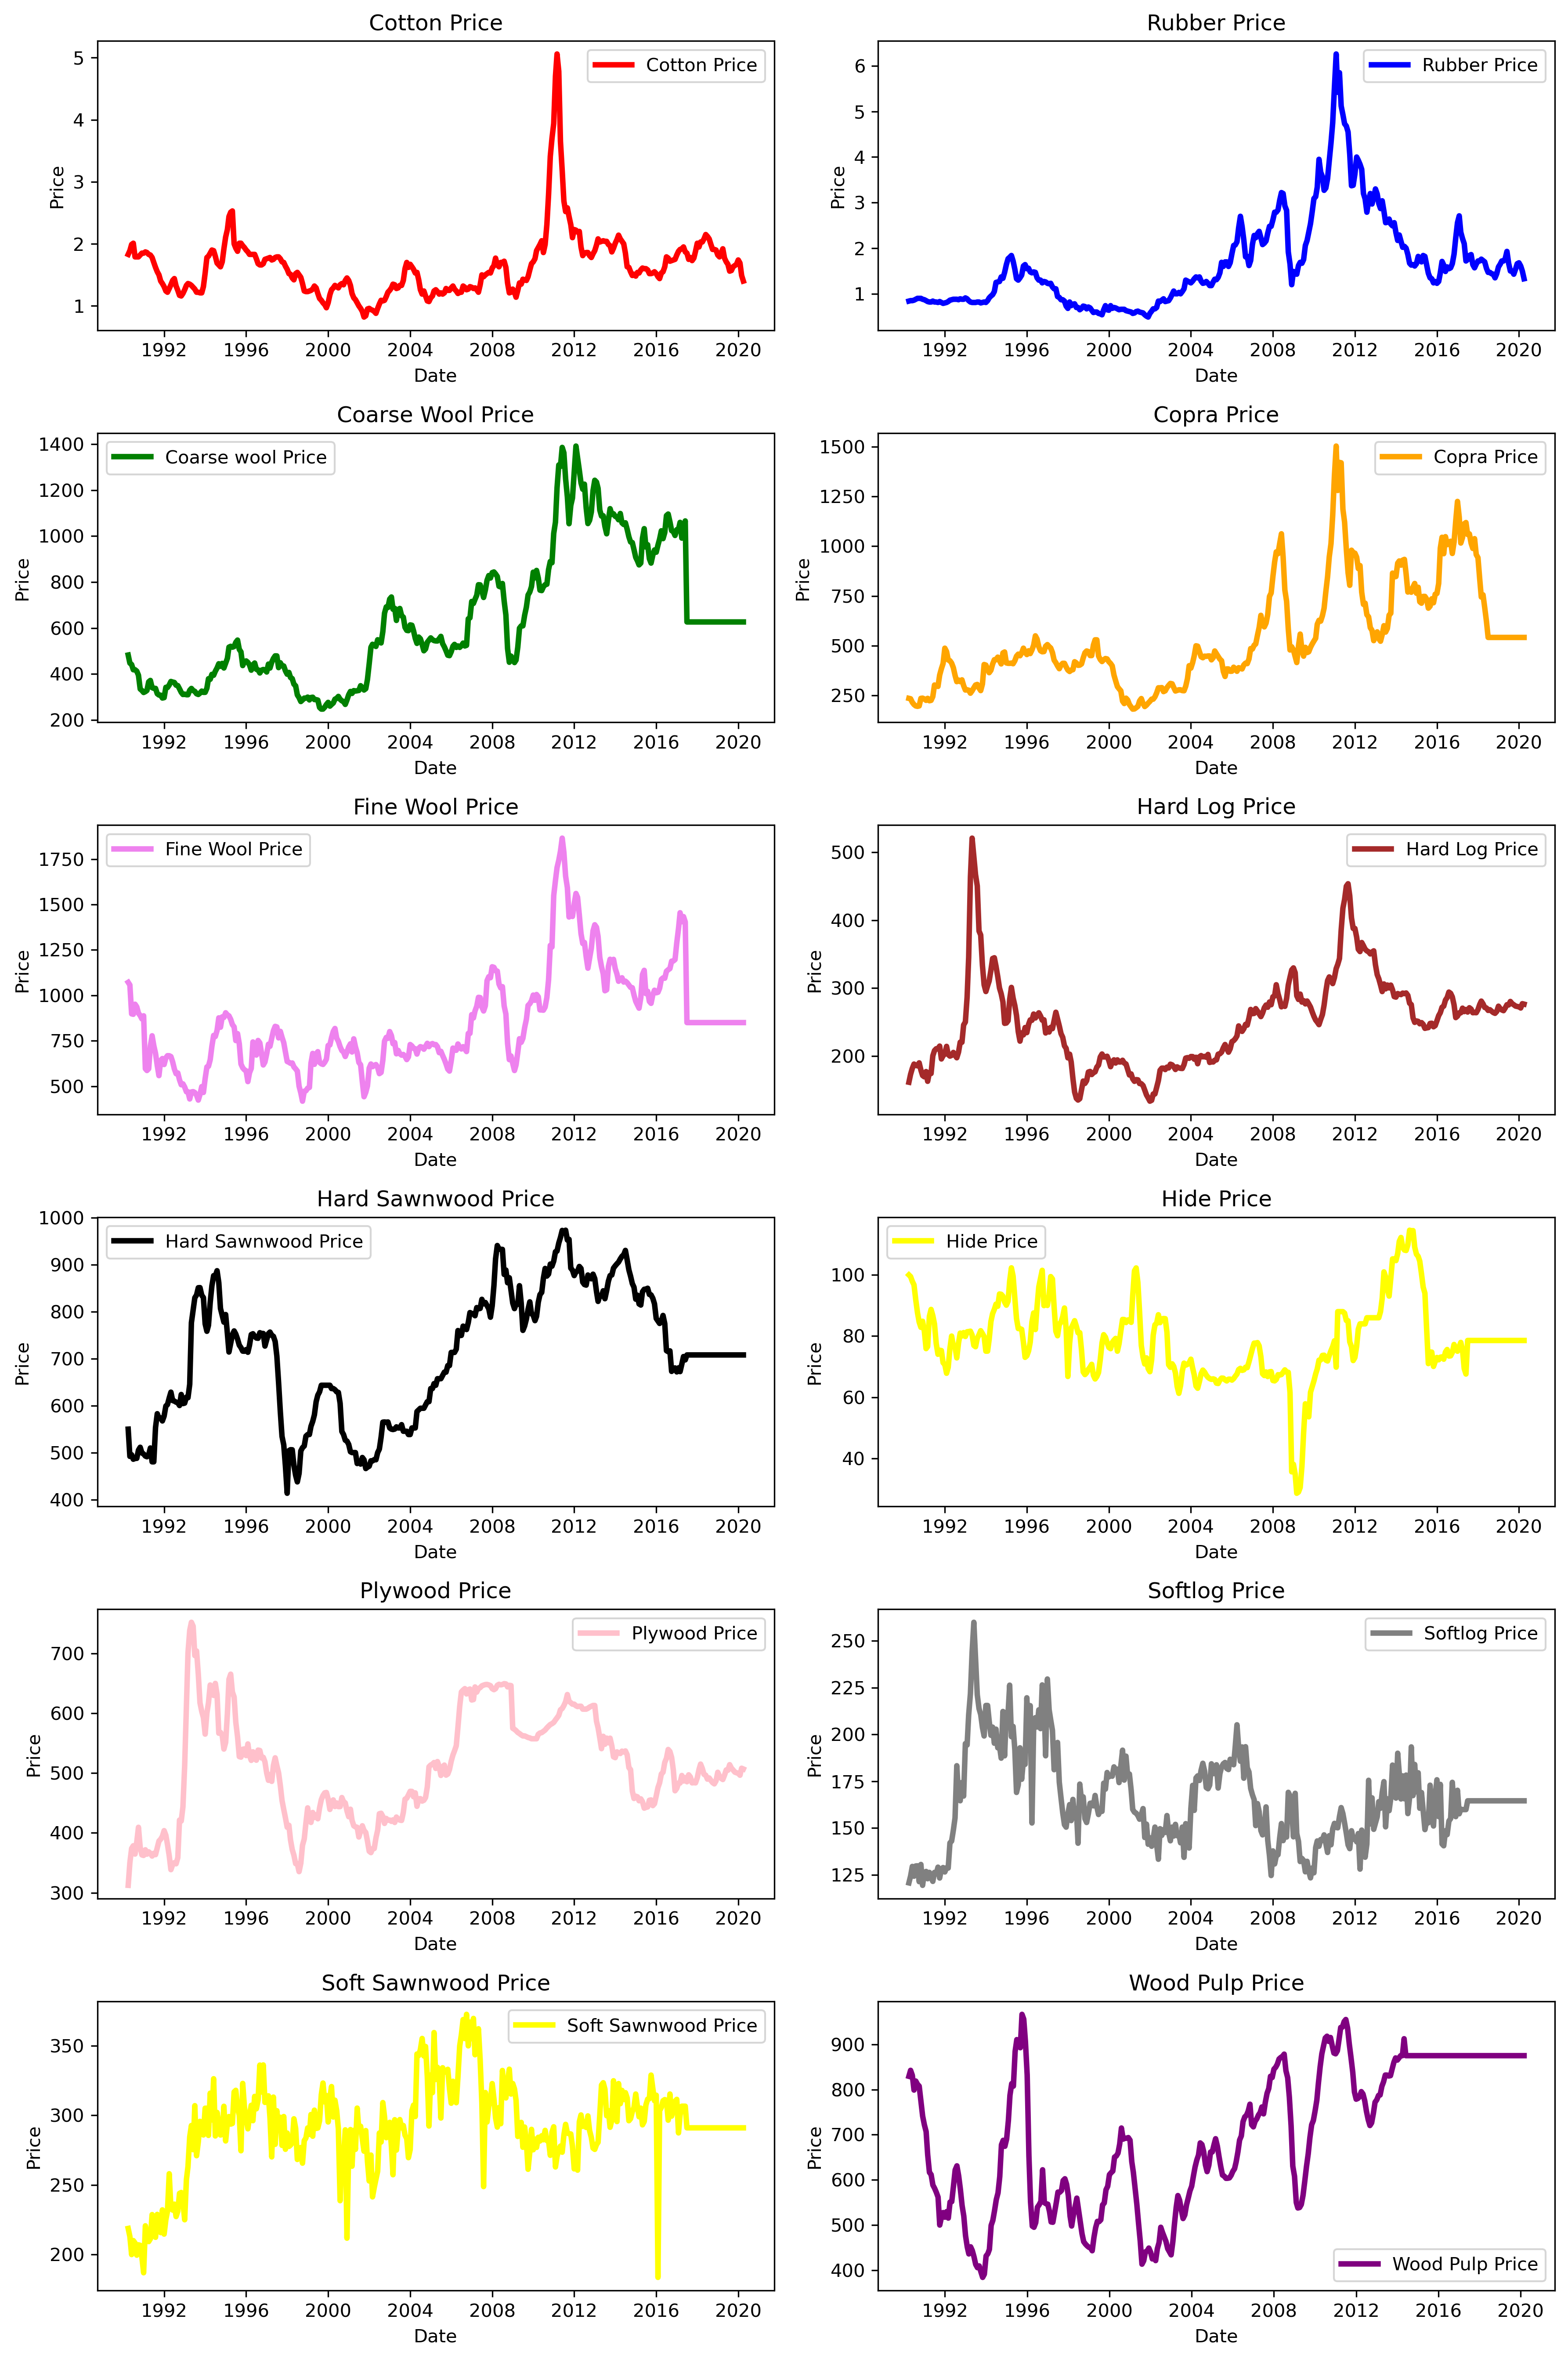

In [50]:
import matplotlib.pyplot as plt

# Create a figure with a 6x2 grid
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12, 18), dpi=300)

# Plot each price in separate subplots without using a for loop
axs[0, 0].plot(df_copy_2['date'], df_copy_2['Cotton Price'], color='red', lw=3, label='Cotton Price')
axs[0, 0].set_title('Cotton Price')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price')
axs[0, 0].legend()

axs[0, 1].plot(df_copy_2['date'], df_copy_2['Rubber Price'], color='blue', lw=3, label='Rubber Price')
axs[0, 1].set_title('Rubber Price')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price')
axs[0, 1].legend()

axs[1, 0].plot(df_copy_2['date'], df_copy_2['Coarse wool Price'], color='green', lw=3, label='Coarse wool Price')
axs[1, 0].set_title('Coarse Wool Price')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Price')
axs[1, 0].legend()

axs[1, 1].plot(df_copy_2['date'], df_copy_2['Copra Price'], color='orange', lw=3, label='Copra Price')
axs[1, 1].set_title('Copra Price')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Price')
axs[1, 1].legend()

axs[2, 0].plot(df_copy_2['date'], df_copy_2['Fine wool Price'], color='violet', lw=3, label='Fine Wool Price')
axs[2, 0].set_title('Fine Wool Price')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('Price')
axs[2, 0].legend()

axs[2, 1].plot(df_copy_2['date'], df_copy_2['Hard log Price'], color='brown', lw=3, label='Hard Log Price')
axs[2, 1].set_title('Hard Log Price')
axs[2, 1].set_xlabel('Date')
axs[2, 1].set_ylabel('Price')
axs[2, 1].legend()

axs[3, 0].plot(df_copy_2['date'], df_copy_2['Hard sawnwood Price'], color='black', lw=3, label='Hard Sawnwood Price')
axs[3, 0].set_title('Hard Sawnwood Price')
axs[3, 0].set_xlabel('Date')
axs[3, 0].set_ylabel('Price')
axs[3, 0].legend()

axs[3, 1].plot(df_copy_2['date'], df_copy_2['Hide Price'], color='yellow', lw=3, label='Hide Price')
axs[3, 1].set_title('Hide Price')
axs[3, 1].set_xlabel('Date')
axs[3, 1].set_ylabel('Price')
axs[3, 1].legend()

axs[4, 0].plot(df_copy_2['date'], df_copy_2['Plywood Price'], color='pink', lw=3, label='Plywood Price')
axs[4, 0].set_title('Plywood Price')
axs[4, 0].set_xlabel('Date')
axs[4, 0].set_ylabel('Price')
axs[4, 0].legend()

axs[4, 1].plot(df_copy_2['date'], df_copy_2['Softlog Price'], color='grey', lw=3, label='Softlog Price')
axs[4, 1].set_title('Softlog Price')
axs[4, 1].set_xlabel('Date')
axs[4, 1].set_ylabel('Price')
axs[4, 1].legend()

axs[5, 0].plot(df_copy_2['date'], df_copy_2['Soft sawnwood Price'], color='yellow', lw=3, label='Soft Sawnwood Price')
axs[5, 0].set_title('Soft Sawnwood Price')
axs[5, 0].set_xlabel('Date')
axs[5, 0].set_ylabel('Price')
axs[5, 0].legend()

axs[5, 1].plot(df_copy_2['date'], df_copy_2['Wood pulp Price'], color='purple', lw=3, label='Wood Pulp Price')
axs[5, 1].set_title('Wood Pulp Price')
axs[5, 1].set_xlabel('Date')
axs[5, 1].set_ylabel('Price')
axs[5, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
